<font color="#0D9DF0"><h3><B>Trabalho Final - Python para Ciência de Dados</b></h3></font>
***

---
# Análise do Desenvolvimento Humano e Econômico Global com base nos dados obtidos no site Gapminder

## INTRODUCAO
---
#### Membros
1. Andre Augusto Ferreira Cabelo
2. Bruno Braga Guedes Cardoso
3. Bruno dos Santos Crivelli
4. Marcelo Tranche de Souza Junior

Este trabalho tem como objetivo analisar os indicadores da Base de Dados gapminder_full.csv gerando gráficos que mostram o quanto são grandes as diferenças e desigualdades existentes no mundo

Os campos do dataframe e suas nomenclaturas são:
 
- Pais (country)
- Ano (year)
- População (pop)
- Continente (continent)
- Expectativa de Vida (lifeExp)
- Produto Interno Bruto per Capita (gdpPercap)

A base em questão reune métricas desde 1952 de fatores como renda per capta, expectativa de vida, continente e população. Além disso, foram consideradas outras 5 bases, também do Gapminder, que tem as seguintes nomenclaturas:

1. GDP Per Data (Price and inflation adjusted) - Contém os dados de GPD ajustado pela inflação, dado que a base original trás apenas os dados do ano corrente.
2. Extreme poverty rate (less then $2.15 ...) - Contém os dados do percentual da população que está na extrema pobreza, isto é, recebendo menos que $2,15 por dia.
3. Child mortality (per 1000 live births) - Contém a quantidade de crianças que morrem por ano a cada 1000 nascimentos
4. Human Development Index (HDI) - Contém o score do IDH de cada país por ano
5. Population Density (per square km) - Contém a densidade populacional por metro quadrado de cada país por ano
6. Mortes por conflitos armados - Contém o volume de pessoas que morreram, por ano, em conflitos armados

Etapas que serão seguidas:

- Carregamento das informações
- Tratamento dos dados
    - Remoção dados duplicados
    - Avaliar dados ausentes
- Elaborar códigos e gráficos correlacionando/agrupando os dados

---
## 2. Coleta, Limpeza e Análise Exploratória (AED)

### Objetivo
Preparar os dados, tratando inconsistências e identificando padrões iniciais.

## COLETA, LIMPEZA E ANALISE EXPLORATORIA (AED)
---
### Carregamento do Dataset

A primeira coisa a ser feita é importar os arquivos de classe auxiliares e fazer a leitura da base original do gapminder:

In [2]:
import sys
sys.path.append('../avaliacao-python-ciencia-dados/')

from utils.data_analisys import *
from utils.data_manipulation import *
from utils.database_manipulation import *


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

**_Momento setup de projeto_**

_O projeto encontra-se estruturado em alguns blocos, mas daremos um breve resumo da estrutura:_
- _Pasta Bases: Contém todas as bases utilizadas durante esse projeto. As bases originais estão disponíveis na raiz, enquanto as bases tratadas TODAS foram salvas na pasta **tratada**, isso inclui não só a tabela principal com a junção de todas as outras bases, mas também suas respectivas bases tratadas de forma individual._
- _Pasta Enunciado: Contém o enunciado do trabalho._
- _Pasta scr: Contém os códigos fonte do projeto. O arquivo notebook está disponível na raiz, mas também há uma pasta **utils** que contém as funções utilizadas ao longo de todo o projeto._

Em seguida, vamos importar a tabela principal e imprimir suas primeiras linhas, que está salva na pasta de Bases

In [3]:
base_gapminder = importa_csv(dataframe_name='../../avaliacao-python-ciencia-dados/Bases/gapminder_full.csv', separador=',', encoding='utf-8')
base_gapminder.head()

Importando o dataframe: ../../avaliacao-python-ciencia-dados/Bases/gapminder_full.csv ...
Dataframe importado com sucesso! 
Dimensão: (1736, 6)


,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


## LIMPEZA E TRATAMENTO DE DADOS
---

Em seguida, rodaremos 2 funções de análise e 1 de limpeza:
- Analisa Dados Ausentes: Lista quais registros tem colunas com dados faltantes
- Verifica Dados Duplicados: Lista quais registros são duplicados
- Remove Dados Duplicados: Remove as duplicatas da base, evitando cacofonia dos dados

In [4]:
analisa_dados_ausentes(base_gapminder)

,variavel_analisada,Quantidade,Percentual


Rodando essa função, foi possível ver que não há dados ausentes na base.

In [5]:
verifica_dados_duplicados(base_gapminder)

Foram encontrados 32 registros duplicados

Prévia dos dados duplicados:


,country,year,pop,continent,lifeExp,gdpPercap
72,Afghanistan,1997,22227415.0,Asia,41.763,635.341351
145,Bolivia,1987,6156369.0,Americas,57.251,2753.691490
146,Bolivia,1992,6893451.0,Americas,59.957,2961.699694
147,Bolivia,1997,7693188.0,Americas,62.050,3326.143191
148,Bolivia,2002,8445134.0,Americas,63.883,3413.262690


Já esta demonstra que temos 32 duplicatas na base, que serão removidas a seguir:

In [6]:
base_limpa = remove_dados_duplicados(base_gapminder)
base_limpa.head()

Removendo dados duplicados ...
Foram encontrados 32 registros duplicados

Prévia dos dados duplicados:
Dados duplicados removidos com sucesso! 
Dimensão: (1704, 6)


,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


O arquivo continha 1736 linhas e agora possui apenas 1704, o que demonstra que não há mais duplicatas no arquivo.

Após isso, rodamos 2 comandos pra analisar a qualidade e formato dos dados:

In [7]:
base_limpa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1704 entries, 0 to 1735
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   year       1704 non-null   int64  
 2   pop        1704 non-null   float64
 3   continent  1704 non-null   object 
 4   lifeExp    1704 non-null   float64
 5   gdpPercap  1704 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 93.2+ KB


In [8]:
base_limpa.describe()

,year,pop,lifeExp,gdpPercap
count,1704.00000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,2.960121e+07,59.474439,7215.327081
std,17.26533,1.061579e+08,12.917107,9857.454543
min,1952.00000,6.001100e+04,23.599000,241.165876
25%,1965.75000,2.793664e+06,48.198000,1202.060309
50%,1979.50000,7.023596e+06,60.712500,3531.846988
75%,1993.25000,1.958522e+07,70.845500,9325.462346
max,2007.00000,1.318683e+09,82.603000,113523.132900


Nessa primeira análise identificamos que os tipos estão fazendo sentido de acordo com os valores registrados em cada coluna, apesar de ser estranho população estar em ponto flutuante. Ao analisar, descobrimos o seguinte:
#### Problemas encontrados olhando o dataset e as infos:
1. Índia -> Pop com Notação Científica - Verificar se precisa tratar
2. China -> Pop com decimal
3. Reduzir renda per capita para 2 casas decimais
4. Reduzir expectativa de vida para 1 casa decimal
5. Mínimo de Expectativa de vida de 23.599 é  estranho (Spolier alert: Não é estranho não rs)
6. double check pra ver se tem gente com ano faltando

Vamos começar a tratas esses problemas em seguida:

In [9]:
# Reduzir renda per capita para 2 casas decimais
base_limpa['gdpPercap'] = base_limpa['gdpPercap'].round(2)

# Reduzir expectativa de vida para 1 casa decimal
base_limpa['lifeExp'] = base_limpa['lifeExp'].round(1)

# Tratar população da Índia e China aproveitando já converte todo mundo logo
base_limpa["pop"] = base_limpa["pop"].astype("int64")
#base_limpa["pop"] = base_limpa["pop"].apply(lambda x: f"{x:,.0f}".replace(",", "."))

# Rwanda teve uma guerra civil em 1994, o que impactou a expectativa de vida do país. Isso foi visto pq paramos no meio da análise aqui 
# pra achar e vimos que teve guerra, o que nos levou a buscar a base de guerras. O valor de 23.599 é real e não um erro de base, e vem de Rwanda.

# Analisar quais paises tem anos faltando -> Não parece ter impacto
anos_por_pais = base_limpa.groupby("country").count()["year"].reset_index().sort_values(by="year", ascending=True)
anos_por_pais.head(1000)


C:\Users\bruno\AppData\Local\Temp\ipykernel_33300\3297481364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_limpa['gdpPercap'] = base_limpa['gdpPercap'].round(2)
C:\Users\bruno\AppData\Local\Temp\ipykernel_33300\3297481364.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_limpa['lifeExp'] = base_limpa['lifeExp'].round(1)
C:\Users\bruno\AppData\Local\Temp\ipykernel_33300\3297481364.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

,country,year
0,Afghanistan,12
1,Albania,12
2,Algeria,12
3,Angola,12
4,Argentina,12
...,...,...
137,Vietnam,12
138,West Bank and Gaza,12
139,Yemen Rep.,12
140,Zambia,12


Vamos tirar a teima pra China e India:

In [10]:
base_limpa[base_limpa['country'] == 'China'].head(30)

,country,year,pop,continent,lifeExp,gdpPercap
297,China,1952,556263527,Asia,44.0,400.45
298,China,1957,637408000,Asia,50.5,575.99
299,China,1962,665770000,Asia,44.5,487.67
300,China,1967,754550000,Asia,58.4,612.71
301,China,1972,862030000,Asia,63.1,676.90
302,China,1977,943455000,Asia,64.0,741.24
303,China,1982,1000281000,Asia,65.5,962.42
304,China,1987,1084035000,Asia,67.3,1378.90
305,China,1992,1164970000,Asia,68.7,1655.78
306,China,1997,1230075000,Asia,70.4,2289.23


In [11]:
base_limpa[base_limpa['country'] == 'India'].head(30)

,country,year,pop,continent,lifeExp,gdpPercap
728,India,1952,372000000,Asia,37.4,546.57
729,India,1957,409000000,Asia,40.2,590.06
730,India,1962,454000000,Asia,43.6,658.35
731,India,1967,506000000,Asia,47.2,700.77
732,India,1972,567000000,Asia,50.7,724.03
733,India,1977,634000000,Asia,54.2,813.34
734,India,1982,708000000,Asia,56.6,855.72
735,India,1987,788000000,Asia,58.6,976.51
736,India,1992,872000000,Asia,60.2,1164.41
737,India,1997,959000000,Asia,61.8,1458.82


Tudo certo, agora o arquivo parece pronto pra análise.

A seguir, começaremos a tratar todas as bases com as quais estamos lidando.

### Carregamento das bases Auxiliares

Começaremos com a base que mais deu trabalho, a base de guerras. As demais bases são semelhantes em estrutura, então o processo de tratamento é o mesmo, sendo este isolado num método apropriado.

A complexidade da base de mortes por guerra reside no fato de ser uma base descritiva anual, ou seja, eu tenho o número de mortes por ano, enquanto nosso dataset só possui registros de 5 em 5 anos. Além disso, o intervalo dessa base vai de 1989 à 2024, o que cria um período de "vácuo" onde essas bases não possuem dados. Isso será levado em conta na análise pra limitar os resultados desse indicador no período de 1989 a 2007, pois a base principal se encerra em 2007.

Dito isso, seguem os pontos necessários pra essa base:
1. Importar
2. Analisar dados ausentes e remover duplicadas se tiver
3. Agregar as mortes pros anos disponíveis na base principal, expurgando tudo que vier dps de 2007 e somando tudo que vier de 5 em 5 anos (Ex.: o dado de 2007 tem que ser 2003+2004+2005+2006+2007, pois óbitos é um indicador acumulativo, diferente dos demais dessa tabela)
4. Renomear as colunas principais do dataset, pois seus respectivos nomes são muito grandes pra serem devidamente analisados durante uma leitura ideal
5. Gerar uma coluna que some o total de mortes do período, pra uma análise consolidada
6. Por fim, agregar ao dataset principal pra gente ter tudo no mesmo lugar para futuras análises

O código abaixo tá comentado com cada passo:

In [12]:
# Tratar a base de mortes por guerra e adicionar na brincadeira:
mortes_guerra = importa_csv(dataframe_name='../../avaliacao-python-ciencia-dados/Bases/deaths-in-armed-conflicts-by-type.csv', separador=',', encoding='utf-8')

analisa_dados_ausentes(mortes_guerra)
verifica_dados_duplicados(mortes_guerra) # tem 0 registros duplicados

mortes_guerra.describe() #7632 registros


Importando o dataframe: ../../avaliacao-python-ciencia-dados/Bases/deaths-in-armed-conflicts-by-type.csv ...
Dataframe importado com sucesso! 
Dimensão: (7632, 8)
Foram encontrados 0 registros duplicados

Prévia dos dados duplicados:


,Year,Deaths in ongoing conflicts (best estimate) - Conflict type: one-sided violence,Deaths in ongoing conflicts (best estimate) - Conflict type: non-state conflict,Deaths in ongoing conflicts (best estimate) - Conflict type: extrasystemic,Deaths in ongoing conflicts (best estimate) - Conflict type: intrastate,Deaths in ongoing conflicts (best estimate) - Conflict type: interstate
count,7632.000000,7632.000000,7632.000000,7632.0,7632.000000,7632.000000
mean,2006.500000,465.031053,150.082154,0.0,780.564465,149.083726
std,10.388975,15443.385459,1198.977717,0.0,6677.569455,3112.485153
min,1989.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1997.750000,0.000000,0.000000,0.0,0.000000,0.000000
50%,2006.500000,0.000000,0.000000,0.0,0.000000,0.000000
75%,2015.250000,0.000000,0.000000,0.0,0.000000,0.000000
max,2024.000000,779683.000000,31054.000000,0.0,199567.000000,91708.000000


In [13]:
#Realizar agregação por pais e ano, equalizando a coluna de ano com as da base principal
#A base de mortes em guerra vai de 89 a 2024 e a base principal de 1952 a 2007. teremos apenas um pequeno intervalo de anos de interseção
# que será agregado e analisado
anos = [1952, 1957, 1962, 1967, 1972,1977,1982,1987,1992,1997,2002,2007]
colunas_agrupadas = ['Deaths in ongoing conflicts (best estimate) - Conflict type: one-sided violence','Deaths in ongoing conflicts (best estimate) - Conflict type: non-state conflict','Deaths in ongoing conflicts (best estimate) - Conflict type: extrasystemic','Deaths in ongoing conflicts (best estimate) - Conflict type: intrastate','Deaths in ongoing conflicts (best estimate) - Conflict type: interstate']
#renomeia coluna de ano pra ficar no padrão de programação e das demais tabelas (camelCase)
renomeia_coluna(mortes_guerra, nome_anterior='Year', novo_nome='year', inplace=True)

mortes_guerra = agrega_anos(mortes_guerra, anos, colunas_agrupadas,coluna_agrupamento = ['Entity'])
mortes_guerra.info() # 848 registros  -> 9 registros por país certinho

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 7 columns):
 #   Column                                                                               Non-Null Count  Dtype 
---  ------                                                                               --------------  ----- 
 0   Entity                                                                               848 non-null    object
 1   Deaths in ongoing conflicts (best estimate) - Conflict type: one-sided violence_sum  848 non-null    int64 
 2   Deaths in ongoing conflicts (best estimate) - Conflict type: non-state conflict_sum  848 non-null    int64 
 3   Deaths in ongoing conflicts (best estimate) - Conflict type: extrasystemic_sum       848 non-null    int64 
 4   Deaths in ongoing conflicts (best estimate) - Conflict type: intrastate_sum          848 non-null    int64 
 5   Deaths in ongoing conflicts (best estimate) - Conflict type: interstate_sum          848 non-null   

In [14]:
# renomeiar colunas para facilitar o uso e entendimento do que tá rolando.
renomeia_coluna(mortes_guerra, nome_anterior='Entity', novo_nome='country', inplace=True)
renomeia_coluna(mortes_guerra, nome_anterior='Deaths in ongoing conflicts (best estimate) - Conflict type: one-sided violence_sum', novo_nome='oneSidedViolence', inplace=True)
renomeia_coluna(mortes_guerra, nome_anterior='Deaths in ongoing conflicts (best estimate) - Conflict type: non-state conflict_sum', novo_nome='nonStateConflict', inplace=True)
renomeia_coluna(mortes_guerra, nome_anterior='Deaths in ongoing conflicts (best estimate) - Conflict type: extrasystemic_sum', novo_nome='extrasystemic', inplace=True)
renomeia_coluna(mortes_guerra, nome_anterior='Deaths in ongoing conflicts (best estimate) - Conflict type: intrastate_sum', novo_nome='intrastate', inplace=True)
renomeia_coluna(mortes_guerra, nome_anterior='Deaths in ongoing conflicts (best estimate) - Conflict type: interstate_sum', novo_nome='interstate', inplace=True)

,country,oneSidedViolence,nonStateConflict,extrasystemic,intrastate,interstate,year
0,Abkhazia,0,0,0,0,0,1992
1,Abkhazia,0,0,0,0,0,1997
2,Abkhazia,0,0,0,0,0,2002
3,Abkhazia,0,0,0,0,0,2007
4,Abyei,0,0,0,0,0,1992
...,...,...,...,...,...,...,...
843,Zambia,0,0,0,0,0,2007
844,Zimbabwe,51,0,0,0,0,1992
845,Zimbabwe,0,0,0,0,0,1997
846,Zimbabwe,0,0,0,0,0,2002


In [15]:
# Validando o caso de Rwanda pra ver se deu tudo certo
filtro = mortes_guerra['country'] == 'Rwanda'
ausentes = mortes_guerra[filtro].index
mortes_guerra.loc[ausentes].head()

# A soma pra Rwanda bateu certinho cruzando com a base original (fiz na calculadora mesmo rs)

,country,oneSidedViolence,nonStateConflict,extrasystemic,intrastate,interstate,year
620,Rwanda,3013,0,0,1366,0,1992
621,Rwanda,782261,92,0,3344,0,1997
622,Rwanda,708,0,0,3139,0,2002
623,Rwanda,0,0,0,0,0,2007


In [16]:
# Gerar uma coluna com o total de mortes por guerra
mortes_guerra['totalWarDeaths'] = mortes_guerra[['oneSidedViolence', 'nonStateConflict', 'extrasystemic', 'intrastate', 'interstate']].sum(axis=1)
mortes_guerra.loc[ausentes].head()

,country,oneSidedViolence,nonStateConflict,extrasystemic,intrastate,interstate,year,totalWarDeaths
620,Rwanda,3013,0,0,1366,0,1992,4379
621,Rwanda,782261,92,0,3344,0,1997,785697
622,Rwanda,708,0,0,3139,0,2002,3847
623,Rwanda,0,0,0,0,0,2007,0


In [17]:
#Agora a gente junta as 2 bases usando o left join pra garantir que todos os registros da original vão entrar, principalmente por sabermos que a
#base de guerras tem dados faltantes pra vários anos
juncao = junta_dataframes(base_limpa, mortes_guerra, chave=['country', 'year'], tipo_juncao='left')
juncao.head()

Dataframes unidos com sucesso! 
Dimensão: (1704, 12)


,country,year,pop,continent,lifeExp,gdpPercap,oneSidedViolence,nonStateConflict,extrasystemic,intrastate,interstate,totalWarDeaths
0,Afghanistan,1952,8425333,Asia,28.8,779.45,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1957,9240934,Asia,30.3,820.85,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1962,10267083,Asia,32.0,853.10,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1967,11537966,Asia,34.0,836.20,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1972,13079460,Asia,36.1,739.98,NaN,NaN,NaN,NaN,NaN,NaN


Agora seguiremos pras outras tabelas, cujo processo será sempre o mesmo:
1. Importar
2. Remover duplicadas se tiver
3. Transpor o dataset, pois ele tem uma coluna pra cada ano por pais, é necessário que ele tenha uma linha para cada país + ano para podermos cruzar com o dataset principal (Método desenvolvido com a ajuda de IA)
4. Renomear as colunas pra manter o padrão das bases
5. Arredondar os valores pra 2 casas decimais
6. Por fim, agregar ao dataset principal pra gente ter tudo no mesmo lugar para futuras análises

In [18]:
#Agora vamos agregar a tabela de GDP ajustado pela inflação
base_gdp_ajustado = importa_csv(dataframe_name='../../avaliacao-python-ciencia-dados/Bases/gdp_pcap_inflaction_adjusted.csv', separador=',', encoding='utf-8')
base_gdp_ajustado.head()

Importando o dataframe: ../../avaliacao-python-ciencia-dados/Bases/gdp_pcap_inflaction_adjusted.csv ...
Dataframe importado com sucesso! 
Dimensão: (193, 303)


,geo,name,1800,1801,1802,1803,1804,1805,1806,1807,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,afg,Afghanistan,480.75476,480.75476,480.75476,480.75476,480.75476,480.75476,480.75476,480.75476,...,4684.97868,4793.65905,4905.29816,5019.97187,5137.75735,5258.73302,5382.97857,5510.57490,5641.60409,5776.14935
1,ago,Angola,373.05144,374.25872,376.06965,377.88058,379.08787,380.89880,382.70973,384.52066,...,24542.76609,25049.27925,25561.99308,26080.79692,26605.57338,27136.19842,27672.54146,28214.46550,28761.82726,29314.47731
2,alb,Albania,469.30821,470.65412,472.00389,473.35753,474.71505,476.07647,477.44178,478.81102,...,54455.30605,55061.03873,55663.53627,56262.63285,56858.16757,57449.98463,58037.93335,58621.86829,59201.64931,59777.14164
3,and,Andorra,1370.15106,1372.44036,1374.72967,1378.16364,1380.45294,1382.74225,1385.03156,1387.32087,...,79877.72947,80165.94404,80449.12000,80727.31187,81000.57506,81268.96576,81532.54087,81791.35793,82045.47508,82294.95092
4,are,UAE,1142.36487,1145.79884,1150.37745,1154.95607,1159.53469,1162.96865,1167.54727,1172.12588,...,92569.33855,92603.91018,92637.70452,92670.73861,92703.02914,92734.59243,92765.44449,92795.60097,92825.07719,92853.88818


In [19]:
#Trata a tabela usando a função que vai ser reutilizada nas próximas tb
base_gdp_ajustado = transpoe_e_trata_dataframe(base_gdp_ajustado, nome_coluna_resultado='gdpPerCaptaInflactionAdjusted')
base_gdp_ajustado.head()

Removendo dados duplicados ...
Foram encontrados 0 registros duplicados

Prévia dos dados duplicados:
Dados duplicados removidos com sucesso! 
Dimensão: (58093, 3)


,country,year,gdpPerCaptaInflactionAdjusted
0,Afghanistan,1800,480.75
1,Afghanistan,1801,480.75
2,Afghanistan,1802,480.75
3,Afghanistan,1803,480.75
4,Afghanistan,1804,480.75


In [20]:
#Agora a gente junta as 2 bases pra ver no que dá
juncao = junta_dataframes(juncao, base_gdp_ajustado, chave=['country', 'year'], tipo_juncao='left')
juncao.head()

Dataframes unidos com sucesso! 
Dimensão: (1704, 13)


,country,year,pop,continent,lifeExp,gdpPercap,oneSidedViolence,nonStateConflict,extrasystemic,intrastate,interstate,totalWarDeaths,gdpPerCaptaInflactionAdjusted
0,Afghanistan,1952,8425333,Asia,28.8,779.45,NaN,NaN,NaN,NaN,NaN,NaN,1540.11
1,Afghanistan,1957,9240934,Asia,30.3,820.85,NaN,NaN,NaN,NaN,NaN,NaN,1708.81
2,Afghanistan,1962,10267083,Asia,32.0,853.10,NaN,NaN,NaN,NaN,NaN,NaN,1869.50
3,Afghanistan,1967,11537966,Asia,34.0,836.20,NaN,NaN,NaN,NaN,NaN,NaN,1930.54
4,Afghanistan,1972,13079460,Asia,36.1,739.98,NaN,NaN,NaN,NaN,NaN,NaN,1602.84


In [21]:
#Adicionando a base de extrema pobreza
base_extrema_pobreza = importa_csv(dataframe_name='../../avaliacao-python-ciencia-dados/Bases/gm_extreme_poverty_rate.csv', separador=',', encoding='utf-8')
base_extrema_pobreza.head()

Importando o dataframe: ../../avaliacao-python-ciencia-dados/Bases/gm_extreme_poverty_rate.csv ...
Dataframe importado com sucesso! 
Dimensão: (190, 303)


,geo,name,1800,1801,1802,1803,1804,1805,1806,1807,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,afg,Afghanistan,91.28,91.28,91.28,91.28,91.28,91.28,91.28,91.28,...,4.57,4.49,4.15,3.83,3.55,3.28,2.97,2.71,2.68,2.39
1,ago,Angola,91.81,91.81,91.81,91.81,91.81,91.33,91.33,91.33,...,1.78,1.64,1.51,1.50,1.39,1.29,1.28,1.18,1.09,1.09
2,alb,Albania,92.42,92.42,92.42,92.40,92.40,92.01,92.01,92.01,...,0.11,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.09
3,are,UAE,30.60,29.50,29.50,29.50,29.59,29.59,29.37,29.37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,arg,Argentina,38.64,37.00,37.01,36.49,36.27,36.27,36.04,36.04,...,0.10,0.10,0.10,0.09,0.09,0.09,0.09,0.09,0.09,0.08


In [22]:
#Transposição da base
#Redução de casas decimais
#Ajuste do nome das colunas
base_extrema_pobreza = transpoe_e_trata_dataframe(base_extrema_pobreza, nome_coluna_resultado='extremePovertyRate')
base_extrema_pobreza.head()

Removendo dados duplicados ...
Foram encontrados 0 registros duplicados

Prévia dos dados duplicados:
Dados duplicados removidos com sucesso! 
Dimensão: (53916, 3)


,country,year,extremePovertyRate
0,Afghanistan,1800,91.28
1,Afghanistan,1801,91.28
2,Afghanistan,1802,91.28
3,Afghanistan,1803,91.28
4,Afghanistan,1804,91.28


In [23]:
juncao = junta_dataframes(juncao, base_extrema_pobreza, chave=['country', 'year'], tipo_juncao='left')
juncao.head()

Dataframes unidos com sucesso! 
Dimensão: (1704, 14)


,country,year,pop,continent,lifeExp,gdpPercap,oneSidedViolence,nonStateConflict,extrasystemic,intrastate,interstate,totalWarDeaths,gdpPerCaptaInflactionAdjusted,extremePovertyRate
0,Afghanistan,1952,8425333,Asia,28.8,779.45,NaN,NaN,NaN,NaN,NaN,NaN,1540.11,43.70
1,Afghanistan,1957,9240934,Asia,30.3,820.85,NaN,NaN,NaN,NaN,NaN,NaN,1708.81,37.13
2,Afghanistan,1962,10267083,Asia,32.0,853.10,NaN,NaN,NaN,NaN,NaN,NaN,1869.50,30.54
3,Afghanistan,1967,11537966,Asia,34.0,836.20,NaN,NaN,NaN,NaN,NaN,NaN,1930.54,33.47
4,Afghanistan,1972,13079460,Asia,36.1,739.98,NaN,NaN,NaN,NaN,NaN,NaN,1602.84,43.66


In [24]:
#Adicionando a base de mortalidade infantil
base_mortalidade_infantil = importa_csv(dataframe_name='../../avaliacao-python-ciencia-dados/Bases/child_mortality_0_5_year_olds_dying_per_1000_born.csv', separador=',', encoding='utf-8')
base_mortalidade_infantil.head()

Importando o dataframe: ../../avaliacao-python-ciencia-dados/Bases/child_mortality_0_5_year_olds_dying_per_1000_born.csv ...
Dataframe importado com sucesso! 
Dimensão: (192, 303)


,geo,name,1800,1801,1802,1803,1804,1805,1806,1807,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,afg,Afghanistan,468.58,468.58,468.58,468.58,468.58,468.58,469.98,469.98,...,10.6577,10.4730,10.2963,10.1103,9.9446,9.7574,9.5760,9.4139,9.2223,9.0653
1,ago,Angola,485.68,485.68,485.68,485.68,485.68,485.68,485.68,485.68,...,23.1019,22.8020,22.5032,22.1450,21.8240,21.5334,21.2922,21.0403,20.8104,20.5798
2,alb,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.8035,1.7809,1.7565,1.7306,1.7090,1.6871,1.6672,1.6437,1.6208,1.6005
3,and,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0973,1.0704,1.0470,1.0227,0.9977,0.9737,0.9492,0.9264,0.9049,0.8830
4,are,UAE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.1265,1.1064,1.0879,1.0685,1.0476,1.0305,1.0133,0.9970,0.9795,0.9624


In [25]:
base_mortalidade_infantil = transpoe_e_trata_dataframe(base_mortalidade_infantil, nome_coluna_resultado='childMortalityPer1000Born')
base_mortalidade_infantil.head()

Removendo dados duplicados ...
Foram encontrados 0 registros duplicados

Prévia dos dados duplicados:
Dados duplicados removidos com sucesso! 
Dimensão: (51880, 3)


,country,year,childMortalityPer1000Born
0,Afghanistan,1800,468.58
1,Afghanistan,1801,468.58
2,Afghanistan,1802,468.58
3,Afghanistan,1803,468.58
4,Afghanistan,1804,468.58


In [26]:
juncao = junta_dataframes(juncao, base_mortalidade_infantil, chave=['country', 'year'], tipo_juncao='left')
juncao.head()

Dataframes unidos com sucesso! 
Dimensão: (1704, 15)


,country,year,pop,continent,lifeExp,gdpPercap,oneSidedViolence,nonStateConflict,extrasystemic,intrastate,interstate,totalWarDeaths,gdpPerCaptaInflactionAdjusted,extremePovertyRate,childMortalityPer1000Born
0,Afghanistan,1952,8425333,Asia,28.8,779.45,NaN,NaN,NaN,NaN,NaN,NaN,1540.11,43.70,408.55
1,Afghanistan,1957,9240934,Asia,30.3,820.85,NaN,NaN,NaN,NaN,NaN,NaN,1708.81,37.13,375.91
2,Afghanistan,1962,10267083,Asia,32.0,853.10,NaN,NaN,NaN,NaN,NaN,NaN,1869.50,30.54,345.84
3,Afghanistan,1967,11537966,Asia,34.0,836.20,NaN,NaN,NaN,NaN,NaN,NaN,1930.54,33.47,318.37
4,Afghanistan,1972,13079460,Asia,36.1,739.98,NaN,NaN,NaN,NaN,NaN,NaN,1602.84,43.66,290.73


In [27]:
#Adicionando Arquivo de densidade populacional
base_densidade_populacional = importa_csv(dataframe_name='../../avaliacao-python-ciencia-dados/Bases/population_density_per_square_km.csv', separador=',', encoding='utf-8')
base_densidade_populacional.head()

Importando o dataframe: ../../avaliacao-python-ciencia-dados/Bases/population_density_per_square_km.csv ...
Dataframe importado com sucesso! 
Dimensão: (195, 153)


,geo,name,1950,1951,1952,1953,1954,1955,1956,1957,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,afg,Afghanistan,11.976,12.135,12.302,12.470,12.641,12.825,13.021,13.227,...,191.145,192.292,193.424,194.529,195.581,196.594,197.607,198.622,199.626,200.551
1,ago,Angola,3.651,3.692,3.731,3.775,3.823,3.876,3.934,3.995,...,111.430,112.496,113.540,114.571,115.587,116.580,117.550,118.508,119.446,120.354
2,alb,Albania,45.545,46.586,47.754,49.039,50.408,51.787,53.172,54.674,...,49.057,48.332,47.627,46.943,46.281,45.639,45.016,44.411,43.824,43.251
3,and,Andorra,12.757,12.380,11.607,11.326,11.919,13.118,14.393,15.744,...,112.299,110.923,109.540,108.177,106.832,105.501,104.198,102.920,101.682,100.473
4,are,UAE,1.049,1.120,1.193,1.269,1.347,1.426,1.506,1.588,...,338.973,342.111,345.263,348.432,351.621,354.832,358.069,361.336,364.633,367.964


In [28]:
base_densidade_populacional = transpoe_e_trata_dataframe(base_densidade_populacional, nome_coluna_resultado='popDensityPerSquareKm')
base_densidade_populacional.head()

Removendo dados duplicados ...
Foram encontrados 0 registros duplicados

Prévia dos dados duplicados:
Dados duplicados removidos com sucesso! 
Dimensão: (29445, 3)


,country,year,popDensityPerSquareKm
0,Afghanistan,1950,11.98
1,Afghanistan,1951,12.14
2,Afghanistan,1952,12.30
3,Afghanistan,1953,12.47
4,Afghanistan,1954,12.64


In [29]:
juncao = junta_dataframes(juncao, base_densidade_populacional, chave=['country', 'year'], tipo_juncao='left')
juncao.head()

Dataframes unidos com sucesso! 
Dimensão: (1704, 16)


,country,year,pop,continent,lifeExp,gdpPercap,oneSidedViolence,nonStateConflict,extrasystemic,intrastate,interstate,totalWarDeaths,gdpPerCaptaInflactionAdjusted,extremePovertyRate,childMortalityPer1000Born,popDensityPerSquareKm
0,Afghanistan,1952,8425333,Asia,28.8,779.45,NaN,NaN,NaN,NaN,NaN,NaN,1540.11,43.70,408.55,12.30
1,Afghanistan,1957,9240934,Asia,30.3,820.85,NaN,NaN,NaN,NaN,NaN,NaN,1708.81,37.13,375.91,13.23
2,Afghanistan,1962,10267083,Asia,32.0,853.10,NaN,NaN,NaN,NaN,NaN,NaN,1869.50,30.54,345.84,14.48
3,Afghanistan,1967,11537966,Asia,34.0,836.20,NaN,NaN,NaN,NaN,NaN,NaN,1930.54,33.47,318.37,16.18
4,Afghanistan,1972,13079460,Asia,36.1,739.98,NaN,NaN,NaN,NaN,NaN,NaN,1602.84,43.66,290.73,18.26


In [30]:
#Adicionando a base de desenvolvimento humano (HDI)
base_hdi = importa_csv(dataframe_name='../../avaliacao-python-ciencia-dados/Bases/hdi_human_development_index.csv', separador=',', encoding='utf-8')
base_hdi.head()

Importando o dataframe: ../../avaliacao-python-ciencia-dados/Bases/hdi_human_development_index.csv ...
Dataframe importado com sucesso! 
Dimensão: (192, 36)


,geo,name,1990,1991,1992,1993,1994,1995,1996,1997,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,afg,Afghanistan,0.285,0.291,0.301,0.311,0.305,0.329,0.334,0.338,...,0.497,0.496,0.495,0.496,0.498,0.507,0.501,0.486,0.495,0.496
1,ago,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.577,0.603,0.609,0.610,0.611,0.611,0.610,0.609,0.615,0.616
2,alb,Albania,0.654,0.638,0.622,0.624,0.629,0.638,0.647,0.645,...,0.797,0.797,0.797,0.798,0.801,0.805,0.794,0.794,0.806,0.810
3,and,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.866,0.869,0.872,0.873,0.875,0.876,0.851,0.871,0.893,0.913
4,are,UAE,0.713,0.724,0.729,0.736,0.742,0.747,0.753,0.761,...,0.853,0.857,0.861,0.884,0.901,0.915,0.909,0.903,0.921,0.940


In [31]:
base_hdi = transpoe_e_trata_dataframe(base_hdi, nome_coluna_resultado='humanDevelopmentIndex')
#base_hdi['humanDevelopmentIndex'] = base_hdi['humanDevelopmentIndex'].mul(100).map("{:.0f}%".format)
# Eu ia converter, mas pesquisando, o HDI é normalmente representado como um número decimal entre 0 e 1 mas não necessariamente é um indicador de porcentagem, só é do calculo mesmo, então vou deixar assim.
base_hdi.head()

Removendo dados duplicados ...
Foram encontrados 0 registros duplicados

Prévia dos dados duplicados:
Dados duplicados removidos com sucesso! 
Dimensão: (5906, 3)


,country,year,humanDevelopmentIndex
0,Afghanistan,1990,0.28
1,Afghanistan,1991,0.29
2,Afghanistan,1992,0.30
3,Afghanistan,1993,0.31
4,Afghanistan,1994,0.30


In [32]:
juncao = junta_dataframes(juncao, base_hdi, chave=['country', 'year'], tipo_juncao='left')
juncao.head()

Dataframes unidos com sucesso! 
Dimensão: (1704, 17)


,country,year,pop,continent,lifeExp,gdpPercap,oneSidedViolence,nonStateConflict,extrasystemic,intrastate,interstate,totalWarDeaths,gdpPerCaptaInflactionAdjusted,extremePovertyRate,childMortalityPer1000Born,popDensityPerSquareKm,humanDevelopmentIndex
0,Afghanistan,1952,8425333,Asia,28.8,779.45,NaN,NaN,NaN,NaN,NaN,NaN,1540.11,43.70,408.55,12.30,NaN
1,Afghanistan,1957,9240934,Asia,30.3,820.85,NaN,NaN,NaN,NaN,NaN,NaN,1708.81,37.13,375.91,13.23,NaN
2,Afghanistan,1962,10267083,Asia,32.0,853.10,NaN,NaN,NaN,NaN,NaN,NaN,1869.50,30.54,345.84,14.48,NaN
3,Afghanistan,1967,11537966,Asia,34.0,836.20,NaN,NaN,NaN,NaN,NaN,NaN,1930.54,33.47,318.37,16.18,NaN
4,Afghanistan,1972,13079460,Asia,36.1,739.98,NaN,NaN,NaN,NaN,NaN,NaN,1602.84,43.66,290.73,18.26,NaN


Agora iniciaremos uma análise exploratória básica do projeto, com o objetivo de ver se tem mais algo que se destaque:

In [33]:
juncao.describe()

,year,pop,lifeExp,gdpPercap,oneSidedViolence,nonStateConflict,extrasystemic,intrastate,interstate,totalWarDeaths,gdpPerCaptaInflactionAdjusted,extremePovertyRate,childMortalityPer1000Born,popDensityPerSquareKm,humanDevelopmentIndex
count,1704.00000,1.704000e+03,1704.000000,1704.000000,520.000000,520.000000,520.0,520.000000,520.000000,520.000000,1548.000000,1482.000000,1521.000000,1548.000000,468.000000
mean,1979.50000,2.960121e+07,59.475235,7215.327095,1843.396154,152.476923,0.0,1065.101923,256.819231,3317.794231,9536.118630,29.564143,116.850302,112.672720,0.633141
std,17.26533,1.061579e+08,12.916468,9857.454534,34328.028878,569.971029,0.0,4053.362937,4322.069164,35009.273292,11606.065523,29.217754,100.116115,379.720921,0.177727
min,1952.00000,6.001100e+04,23.600000,241.170000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,433.690000,0.010000,2.850000,0.520000,0.220000
25%,1965.75000,2.793664e+06,48.200000,1202.060000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1918.902500,1.507500,28.350000,14.285000,0.480000
50%,1979.50000,7.023596e+06,60.750000,3531.845000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,4657.985000,18.875000,87.970000,42.765000,0.660000
75%,1993.25000,1.958522e+07,70.800000,9325.462500,46.500000,0.000000,0.0,100.500000,0.000000,372.750000,12143.375000,54.152500,185.910000,104.460000,0.772500
max,2007.00000,1.318683e+09,82.600000,113523.130000,782261.000000,5817.000000,0.0,43871.000000,95934.000000,785697.000000,88925.070000,98.380000,451.010000,6729.890000,0.940000


Alguns pontos de destaque na análise:
1. A coluna extrasystemic está vazia, pode ser removida.
2. Apesar de termos um ano extremamente baixo ali no mínimo (23 anos) a média ainda se manteve em 59 anos, com a mediana ali em 60, o que indica que o valor mínimo é um outlier (justificado pela guerra em Rwanda)
3. no caso da renda per capta, temos uma flutuação absurda entre o valor mínimo e máximo, o que indica um valor que vale a pena analisar mais a fundo
4. Em todos os casos de conflitos mapeados, a mediana foi zero, o que indica que, pelo menos, metade da base é "zerada".
5. gdpPerCaptaInflactionAdjusted -> tem 1548 registros, aproximadamente 200 a menos que a base original, vale analisar o pq.
6. extremePovertyRate -> tem 1482 registros, vale analisar o pq. O valor encontra-se entre 0 e 100, o que faz sentido dado que é um resultado percentual
7. childMortalityPer1000Born ->  tem 1521 registros, vale analisar o pq.
8. popDensityPerSquareKm ->  tem 1548 registros, vale analisar o pq.
9. hdi ->  tem 468 registros, vale analisar o pq. O valor está entre 0 e 1, o que é esperado dado o indicador. 

Agora vamos analisar os indicadores citados acima que parecem esquisitos e remover a coluna vazia.

In [34]:
# Analisar o caso da Rwanda pra ver o outlier mais de perto:
filtro = juncao['country'] == 'Rwanda'
ausentes = juncao[filtro].index
juncao.loc[ausentes].head(20)

,country,year,pop,continent,lifeExp,gdpPercap,oneSidedViolence,nonStateConflict,extrasystemic,intrastate,interstate,totalWarDeaths,gdpPerCaptaInflactionAdjusted,extremePovertyRate,childMortalityPer1000Born,popDensityPerSquareKm,humanDevelopmentIndex
1284,Rwanda,1952,2534927,Africa,40.0,493.32,NaN,NaN,NaN,NaN,NaN,NaN,1135.91,75.50,257.93,95.68,NaN
1285,Rwanda,1957,2822082,Africa,41.5,540.29,NaN,NaN,NaN,NaN,NaN,NaN,1205.18,72.67,242.09,113.50,NaN
1286,Rwanda,1962,3051242,Africa,43.0,597.47,NaN,NaN,NaN,NaN,NaN,NaN,1271.78,70.77,212.41,131.60,NaN
1287,Rwanda,1967,3451079,Africa,44.1,510.96,NaN,NaN,NaN,NaN,NaN,NaN,1036.86,78.70,211.85,149.92,NaN
1288,Rwanda,1972,3992121,Africa,44.6,590.58,NaN,NaN,NaN,NaN,NaN,NaN,1110.96,76.92,227.99,174.32,NaN
1289,Rwanda,1977,4657072,Africa,45.0,670.08,NaN,NaN,NaN,NaN,NaN,NaN,1168.87,75.07,250.95,201.91,NaN
1290,Rwanda,1982,5507565,Africa,46.2,881.57,NaN,NaN,NaN,NaN,NaN,NaN,1270.34,70.34,186.14,235.92,NaN
1291,Rwanda,1987,6349365,Africa,44.0,847.99,NaN,NaN,NaN,NaN,NaN,NaN,1278.75,72.24,150.30,278.79,NaN
1292,Rwanda,1992,7290203,Africa,23.6,737.07,3013.0,0.0,0.0,1366.0,0.0,4379.0,1042.52,74.54,173.21,317.36,NaN
1293,Rwanda,1997,7212583,Africa,36.1,589.94,782261.0,92.0,0.0,3344.0,0.0,785697.0,783.39,78.74,220.75,320.33,0.30


Podemos ver ali, nos anos de 1992 e 1997, houve algum conflito que levou a uma morte massiva no país. Procurando na internet, chegamos à postagem abaixo:
> _"Durante os 100 dias seguintes, entre abril e julho de 1994, ocorreu um massacre sistemático, com cerca de 800 mil a 1 milhão de pessoas mortas, principalmente tutsis, por meio de facões e outras formas de violência."_

Isso justifica o outlier na tabela mesmo olhando pra expectativa de vida de Rwanda, dado que a gueraa civil começou em 1990 e atigiu o ápice em 1994, com essa volumetria exuberante de mortos.

Agora olharemos para a renda per capta, item 3:

In [35]:
juncao.sort_values(by='gdpPercap', ascending=True).head(50)

,country,year,pop,continent,lifeExp,gdpPercap,oneSidedViolence,nonStateConflict,extrasystemic,intrastate,interstate,totalWarDeaths,gdpPerCaptaInflactionAdjusted,extremePovertyRate,childMortalityPer1000Born,popDensityPerSquareKm,humanDevelopmentIndex
334,Congo Dem. Rep.,2002,55379852,Africa,45.0,241.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335,Congo Dem. Rep.,2007,64606759,Africa,46.5,277.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
876,Lesotho,1952,748747,Africa,42.1,298.85,NaN,NaN,NaN,NaN,NaN,NaN,692.20,76.25,237.27,19.83,NaN
624,Guinea-Bissau,1952,580653,Africa,32.5,299.85,NaN,NaN,NaN,NaN,NaN,NaN,655.10,72.93,347.61,19.70,NaN
333,Congo Dem. Rep.,1997,47798986,Africa,42.6,312.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
492,Eritrea,1952,1438760,Africa,35.9,328.94,NaN,NaN,NaN,NaN,NaN,NaN,890.98,82.58,340.88,6.94,NaN
1044,Myanmar,1952,20092996,Asia,36.3,331.00,NaN,NaN,NaN,NaN,NaN,NaN,716.24,89.59,325.33,28.19,NaN
877,Lesotho,1957,813338,Africa,45.0,336.00,NaN,NaN,NaN,NaN,NaN,NaN,747.78,73.79,196.55,22.22,NaN
204,Burundi,1952,2445618,Africa,39.0,339.30,NaN,NaN,NaN,NaN,NaN,NaN,701.27,92.88,277.67,90.78,NaN
493,Eritrea,1957,1542611,Africa,38.0,344.16,NaN,NaN,NaN,NaN,NaN,NaN,908.76,81.76,310.59,7.58,NaN


Como o valor da média ali tá sendo visto sem levar em conta o ano, apenas o indicador como um todo, a análise fica meio limitada, valendo aprofundar mais no próximo item um comparativo por ano específico. Nada de esquisito nos dados aqui.

Agora vamos ao item 5:

In [36]:
gdpPerCaptanulo = juncao[juncao['gdpPerCaptaInflactionAdjusted'].isnull()]
gdpPerCaptanulo.info()
gdpPerCaptanulo['country'].drop_duplicates().head(100)

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, 324 to 1679
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        156 non-null    object 
 1   year                           156 non-null    int64  
 2   pop                            156 non-null    int64  
 3   continent                      156 non-null    object 
 4   lifeExp                        156 non-null    float64
 5   gdpPercap                      156 non-null    float64
 6   oneSidedViolence               12 non-null     float64
 7   nonStateConflict               12 non-null     float64
 8   extrasystemic                  12 non-null     float64
 9   intrastate                     12 non-null     float64
 10  interstate                     12 non-null     float64
 11  totalWarDeaths                 12 non-null     float64
 12  gdpPerCaptaInflactionAdjusted  0 non-null      float

324        Congo Dem. Rep.
336             Congo Rep.
660        Hong Kong China
828        Korea Dem. Rep.
840             Korea Rep.
1248           Puerto Rico
1260               Reunion
1452             Swaziland
1500                Taiwan
1596        United Kingdom
1608         United States
1656    West Bank and Gaza
1668            Yemen Rep.
Name: country, dtype: object

Temos 13 paises esquisitos:
- Congo Dem. Rep.
- Congo Rep.
- Hong Kong China
- Korea Dem. Rep.
- Korea Rep.
- Puerto Rico
- Reunion
- Swaziland
- Taiwan
- United Kingdom
- United States
- West Bank and Gaza
- Yemen Rep.

Analisando, a justificativa é: 
- Congo Dem. Rep. -> nome na tabela é: Congo, Dem. Rep.
- Congo Rep. -> nome na tabela é: Congo, Rep.
- Hong Kong China -> Não existe na tabela
- Korea Dem. Rep. -> South Korea
- Korea Rep. -> nome na tabela é: North Korea
- Puerto Rico -> Não existe na tabela
- Reunion ->  Não existe na tabela, provavelmente tratado na França
- Swaziland ->  nome na tabela é: Eswatini
- Taiwan -> Não existe na tabela, provavelmente tratado na China
- United Kingdom ->  nome na tabela é: UK
- United States ->  nome na tabela é: USA
- West Bank and Gaza ->  nome na tabela é: Palestine
- Yemen Rep. ->  nome na tabela é: Yemen

Com isso, vamos dropar essa coluna, corrigir a base original e refazer o join: (Sei que não é o melhor jeito, dava pra corrigir lá em cima antes de fazer o join, mas ai a gente ia perder o processo, que entendo que é o que você quer capturar aqui, professor, então fiz do jeito mais "burro" ou mais custoso aqui no caso)

In [37]:

renomeia_coluna(juncao, nome_anterior='gdpPerCaptaInflactionAdjusted', novo_nome='gdpPerCapitaInflationAdjusted_old', inplace=True)
juncao.head()

,country,year,pop,continent,lifeExp,gdpPercap,oneSidedViolence,nonStateConflict,extrasystemic,intrastate,interstate,totalWarDeaths,gdpPerCapitaInflationAdjusted_old,extremePovertyRate,childMortalityPer1000Born,popDensityPerSquareKm,humanDevelopmentIndex
0,Afghanistan,1952,8425333,Asia,28.8,779.45,NaN,NaN,NaN,NaN,NaN,NaN,1540.11,43.70,408.55,12.30,NaN
1,Afghanistan,1957,9240934,Asia,30.3,820.85,NaN,NaN,NaN,NaN,NaN,NaN,1708.81,37.13,375.91,13.23,NaN
2,Afghanistan,1962,10267083,Asia,32.0,853.10,NaN,NaN,NaN,NaN,NaN,NaN,1869.50,30.54,345.84,14.48,NaN
3,Afghanistan,1967,11537966,Asia,34.0,836.20,NaN,NaN,NaN,NaN,NaN,NaN,1930.54,33.47,318.37,16.18,NaN
4,Afghanistan,1972,13079460,Asia,36.1,739.98,NaN,NaN,NaN,NaN,NaN,NaN,1602.84,43.66,290.73,18.26,NaN


In [38]:

base_gdp_ajustado = corrige_paises_estranhos(base_gdp_ajustado)

juncao = junta_dataframes(juncao, base_gdp_ajustado, chave=['country', 'year'], tipo_juncao='left')
juncao.describe()

Dataframes unidos com sucesso! 
Dimensão: (1704, 18)


,year,pop,lifeExp,gdpPercap,oneSidedViolence,nonStateConflict,extrasystemic,intrastate,interstate,totalWarDeaths,gdpPerCapitaInflationAdjusted_old,extremePovertyRate,childMortalityPer1000Born,popDensityPerSquareKm,humanDevelopmentIndex,gdpPerCaptaInflactionAdjusted
count,1704.00000,1.704000e+03,1704.000000,1704.000000,520.000000,520.000000,520.0,520.000000,520.000000,520.000000,1548.000000,1482.000000,1521.000000,1548.000000,468.000000,1656.000000
mean,1979.50000,2.960121e+07,59.475235,7215.327095,1843.396154,152.476923,0.0,1065.101923,256.819231,3317.794231,9536.118630,29.564143,116.850302,112.672720,0.633141,9534.027319
std,17.26533,1.061579e+08,12.916468,9857.454534,34328.028878,569.971029,0.0,4053.362937,4322.069164,35009.273292,11606.065523,29.217754,100.116115,379.720921,0.177727,11681.196053
min,1952.00000,6.001100e+04,23.600000,241.170000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,433.690000,0.010000,2.850000,0.520000,0.220000,433.690000
25%,1965.75000,2.793664e+06,48.200000,1202.060000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1918.902500,1.507500,28.350000,14.285000,0.480000,1913.582500
50%,1979.50000,7.023596e+06,60.750000,3531.845000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,4657.985000,18.875000,87.970000,42.765000,0.660000,4581.085000
75%,1993.25000,1.958522e+07,70.800000,9325.462500,46.500000,0.000000,0.0,100.500000,0.000000,372.750000,12143.375000,54.152500,185.910000,104.460000,0.772500,12199.975000
max,2007.00000,1.318683e+09,82.600000,113523.130000,782261.000000,5817.000000,0.0,43871.000000,95934.000000,785697.000000,88925.070000,98.380000,451.010000,6729.890000,0.940000,88925.070000


In [39]:
juncao = juncao.drop(columns=['gdpPerCapitaInflationAdjusted_old'])

Pronto, colunas renomeadas, vamos repetir o processo pro item 6:

In [40]:
pobrezanulo = juncao[juncao['extremePovertyRate'].isnull()]
pobrezanulo.head(100)

,country,year,pop,continent,lifeExp,gdpPercap,oneSidedViolence,nonStateConflict,extrasystemic,intrastate,interstate,totalWarDeaths,extremePovertyRate,childMortalityPer1000Born,popDensityPerSquareKm,humanDevelopmentIndex,gdpPerCaptaInflactionAdjusted
185,Bulgaria,1977,8797022,Europe,70.8,7612.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.25,81.23,NaN,9553.12
186,Bulgaria,1982,8892098,Europe,71.1,8224.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.20,82.22,NaN,11282.34
187,Bulgaria,1987,8971958,Europe,71.3,8239.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.95,82.81,NaN,12751.02
188,Bulgaria,1992,8658506,Europe,71.2,6302.62,0.0,0.0,0.0,0.0,0.0,0.0,NaN,19.24,78.96,0.71,10330.88
189,Bulgaria,1997,8066057,Europe,70.3,5970.39,0.0,0.0,0.0,0.0,0.0,0.0,NaN,19.41,75.81,0.71,10129.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,Kuwait,1977,1140357,Asia,69.3,59265.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.81,70.60,NaN,51804.87
861,Kuwait,1997,1765345,Asia,76.2,40300.62,1.0,0.0,0.0,0.0,0.0,1.0,NaN,13.80,100.33,0.76,51842.44
862,Kuwait,2002,2111561,Asia,76.9,35110.11,0.0,0.0,0.0,0.0,0.0,0.0,NaN,12.35,115.61,0.78,52384.22
863,Kuwait,2007,2505559,Asia,77.6,47306.99,0.0,0.0,0.0,0.0,0.0,0.0,NaN,11.43,140.75,0.80,71487.51


Aqui existe um detalhe a mais: Temos países que não temos dados pra anos em específico, então não trataremos esses casos, trataremos apenas os países já conhecidos.

In [41]:
renomeia_coluna(juncao, nome_anterior='extremePovertyRate', novo_nome='extremePovertyRate_old', inplace=True)

base_extrema_pobreza = corrige_paises_estranhos(base_extrema_pobreza)

juncao = junta_dataframes(juncao, base_extrema_pobreza, chave=['country', 'year'], tipo_juncao='left')
juncao = juncao.drop(columns=['extremePovertyRate_old'])
juncao.describe()

Dataframes unidos com sucesso! 
Dimensão: (1704, 18)


,year,pop,lifeExp,gdpPercap,oneSidedViolence,nonStateConflict,extrasystemic,intrastate,interstate,totalWarDeaths,childMortalityPer1000Born,popDensityPerSquareKm,humanDevelopmentIndex,gdpPerCaptaInflactionAdjusted,extremePovertyRate
count,1704.00000,1.704000e+03,1704.000000,1704.000000,520.000000,520.000000,520.0,520.000000,520.000000,520.000000,1521.000000,1548.000000,468.000000,1656.000000,1589.000000
mean,1979.50000,2.960121e+07,59.475235,7215.327095,1843.396154,152.476923,0.0,1065.101923,256.819231,3317.794231,116.850302,112.672720,0.633141,9534.027319,29.899880
std,17.26533,1.061579e+08,12.916468,9857.454534,34328.028878,569.971029,0.0,4053.362937,4322.069164,35009.273292,100.116115,379.720921,0.177727,11681.196053,29.521719
min,1952.00000,6.001100e+04,23.600000,241.170000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.850000,0.520000,0.220000,433.690000,0.010000
25%,1965.75000,2.793664e+06,48.200000,1202.060000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,28.350000,14.285000,0.480000,1913.582500,1.440000
50%,1979.50000,7.023596e+06,60.750000,3531.845000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,87.970000,42.765000,0.660000,4581.085000,19.060000
75%,1993.25000,1.958522e+07,70.800000,9325.462500,46.500000,0.000000,0.0,100.500000,0.000000,372.750000,185.910000,104.460000,0.772500,12199.975000,54.910000
max,2007.00000,1.318683e+09,82.600000,113523.130000,782261.000000,5817.000000,0.0,43871.000000,95934.000000,785697.000000,451.010000,6729.890000,0.940000,88925.070000,99.300000


Agora vamos ao item 7:

In [42]:
renomeia_coluna(juncao, nome_anterior='childMortalityPer1000Born', novo_nome='childMortalityPer1000Born_old', inplace=True)

base_mortalidade_infantil = corrige_paises_estranhos(base_mortalidade_infantil)

juncao = junta_dataframes(juncao, base_mortalidade_infantil, chave=['country', 'year'], tipo_juncao='left')
juncao = juncao.drop(columns=['childMortalityPer1000Born_old'])
juncao.describe()

Dataframes unidos com sucesso! 
Dimensão: (1704, 18)


,year,pop,lifeExp,gdpPercap,oneSidedViolence,nonStateConflict,extrasystemic,intrastate,interstate,totalWarDeaths,popDensityPerSquareKm,humanDevelopmentIndex,gdpPerCaptaInflactionAdjusted,extremePovertyRate,childMortalityPer1000Born
count,1704.00000,1.704000e+03,1704.000000,1704.000000,520.000000,520.000000,520.0,520.000000,520.000000,520.000000,1548.000000,468.000000,1656.000000,1589.000000,1629.000000
mean,1979.50000,2.960121e+07,59.475235,7215.327095,1843.396154,152.476923,0.0,1065.101923,256.819231,3317.794231,112.672720,0.633141,9534.027319,29.899880,116.648115
std,17.26533,1.061579e+08,12.916468,9857.454534,34328.028878,569.971029,0.0,4053.362937,4322.069164,35009.273292,379.720921,0.177727,11681.196053,29.521719,100.296925
min,1952.00000,6.001100e+04,23.600000,241.170000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.520000,0.220000,433.690000,0.010000,2.850000
25%,1965.75000,2.793664e+06,48.200000,1202.060000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,14.285000,0.480000,1913.582500,1.440000,28.360000
50%,1979.50000,7.023596e+06,60.750000,3531.845000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,42.765000,0.660000,4581.085000,19.060000,88.140000
75%,1993.25000,1.958522e+07,70.800000,9325.462500,46.500000,0.000000,0.0,100.500000,0.000000,372.750000,104.460000,0.772500,12199.975000,54.910000,185.310000
max,2007.00000,1.318683e+09,82.600000,113523.130000,782261.000000,5817.000000,0.0,43871.000000,95934.000000,785697.000000,6729.890000,0.940000,88925.070000,99.300000,458.930000


Agora ao item 8:

In [43]:
renomeia_coluna(juncao, nome_anterior='popDensityPerSquareKm', novo_nome='popDensityPerSquareKm_old', inplace=True)

base_densidade_populacional = corrige_paises_estranhos(base_densidade_populacional)

juncao = junta_dataframes(juncao, base_densidade_populacional, chave=['country', 'year'], tipo_juncao='left')
juncao = juncao.drop(columns=['popDensityPerSquareKm_old'])
juncao.describe()

Dataframes unidos com sucesso! 
Dimensão: (1704, 18)


,year,pop,lifeExp,gdpPercap,oneSidedViolence,nonStateConflict,extrasystemic,intrastate,interstate,totalWarDeaths,humanDevelopmentIndex,gdpPerCaptaInflactionAdjusted,extremePovertyRate,childMortalityPer1000Born,popDensityPerSquareKm
count,1704.00000,1.704000e+03,1704.000000,1704.000000,520.000000,520.000000,520.0,520.000000,520.000000,520.000000,468.000000,1656.000000,1589.000000,1629.000000,1656.000000
mean,1979.50000,2.960121e+07,59.475235,7215.327095,1843.396154,152.476923,0.0,1065.101923,256.819231,3317.794231,0.633141,9534.027319,29.899880,116.648115,113.762923
std,17.26533,1.061579e+08,12.916468,9857.454534,34328.028878,569.971029,0.0,4053.362937,4322.069164,35009.273292,0.177727,11681.196053,29.521719,100.296925,369.073832
min,1952.00000,6.001100e+04,23.600000,241.170000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.220000,433.690000,0.010000,2.850000,0.520000
25%,1965.75000,2.793664e+06,48.200000,1202.060000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.480000,1913.582500,1.440000,28.360000,14.320000
50%,1979.50000,7.023596e+06,60.750000,3531.845000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.660000,4581.085000,19.060000,88.140000,42.765000
75%,1993.25000,1.958522e+07,70.800000,9325.462500,46.500000,0.000000,0.0,100.500000,0.000000,372.750000,0.772500,12199.975000,54.910000,185.310000,109.402500
max,2007.00000,1.318683e+09,82.600000,113523.130000,782261.000000,5817.000000,0.0,43871.000000,95934.000000,785697.000000,0.940000,88925.070000,99.300000,458.930000,6729.890000


Por fim, o item 9:

In [44]:
hdinulo = juncao[juncao['humanDevelopmentIndex'].isnull()].groupby('country').size().reset_index(name='Quantidade').sort_values(by='Quantidade', ascending=False)
hdinulo.head(100)

,country,Quantidade
105,Reunion,12
134,United States,12
121,Swaziland,12
120,Sudan,12
125,Taiwan,12
...,...,...
92,Nicaragua,8
91,New Zealand,8
90,Netherlands,8
89,Nepal,8


Essa aqui o assunto é mais delicado. Ela tem dados da maior parte dos países de forma parcial, o que torna bem difícil da tratativa da tabela. Vamos corrigir o nome dos países que estão errados que conhecemos, mas isso não resolverá o caso dos países que só possuem dados parciais pro intervalo da tabela principal.

In [45]:
renomeia_coluna(juncao, nome_anterior='humanDevelopmentIndex', novo_nome='humanDevelopmentIndex_old', inplace=True)

base_hdi = corrige_paises_estranhos(base_hdi)

juncao = junta_dataframes(juncao, base_hdi, chave=['country', 'year'], tipo_juncao='left')
juncao = juncao.drop(columns=['humanDevelopmentIndex_old'])
juncao.describe()

Dataframes unidos com sucesso! 
Dimensão: (1704, 18)


,year,pop,lifeExp,gdpPercap,oneSidedViolence,nonStateConflict,extrasystemic,intrastate,interstate,totalWarDeaths,gdpPerCaptaInflactionAdjusted,extremePovertyRate,childMortalityPer1000Born,popDensityPerSquareKm,humanDevelopmentIndex
count,1704.00000,1.704000e+03,1704.000000,1704.000000,520.000000,520.000000,520.0,520.000000,520.000000,520.000000,1656.000000,1589.000000,1629.000000,1656.000000,497.000000
mean,1979.50000,2.960121e+07,59.475235,7215.327095,1843.396154,152.476923,0.0,1065.101923,256.819231,3317.794231,9534.027319,29.899880,116.648115,113.762923,0.633602
std,17.26533,1.061579e+08,12.916468,9857.454534,34328.028878,569.971029,0.0,4053.362937,4322.069164,35009.273292,11681.196053,29.521719,100.296925,369.073832,0.178918
min,1952.00000,6.001100e+04,23.600000,241.170000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,433.690000,0.010000,2.850000,0.520000,0.220000
25%,1965.75000,2.793664e+06,48.200000,1202.060000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1913.582500,1.440000,28.360000,14.320000,0.480000
50%,1979.50000,7.023596e+06,60.750000,3531.845000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,4581.085000,19.060000,88.140000,42.765000,0.650000
75%,1993.25000,1.958522e+07,70.800000,9325.462500,46.500000,0.000000,0.0,100.500000,0.000000,372.750000,12199.975000,54.910000,185.310000,109.402500,0.780000
max,2007.00000,1.318683e+09,82.600000,113523.130000,782261.000000,5817.000000,0.0,43871.000000,95934.000000,785697.000000,88925.070000,99.300000,458.930000,6729.890000,0.940000


Mesmo após o tratamento, a completude dos dados desses países ficou muito aquém do esperado, então removemos essa tabela de forma definitiva da junção, pois sua presença provavelmente mais atrapalharia do que ajudaria.

In [46]:

juncao = juncao.drop(columns=['humanDevelopmentIndex'])
juncao.describe()

,year,pop,lifeExp,gdpPercap,oneSidedViolence,nonStateConflict,extrasystemic,intrastate,interstate,totalWarDeaths,gdpPerCaptaInflactionAdjusted,extremePovertyRate,childMortalityPer1000Born,popDensityPerSquareKm
count,1704.00000,1.704000e+03,1704.000000,1704.000000,520.000000,520.000000,520.0,520.000000,520.000000,520.000000,1656.000000,1589.000000,1629.000000,1656.000000
mean,1979.50000,2.960121e+07,59.475235,7215.327095,1843.396154,152.476923,0.0,1065.101923,256.819231,3317.794231,9534.027319,29.899880,116.648115,113.762923
std,17.26533,1.061579e+08,12.916468,9857.454534,34328.028878,569.971029,0.0,4053.362937,4322.069164,35009.273292,11681.196053,29.521719,100.296925,369.073832
min,1952.00000,6.001100e+04,23.600000,241.170000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,433.690000,0.010000,2.850000,0.520000
25%,1965.75000,2.793664e+06,48.200000,1202.060000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1913.582500,1.440000,28.360000,14.320000
50%,1979.50000,7.023596e+06,60.750000,3531.845000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,4581.085000,19.060000,88.140000,42.765000
75%,1993.25000,1.958522e+07,70.800000,9325.462500,46.500000,0.000000,0.0,100.500000,0.000000,372.750000,12199.975000,54.910000,185.310000,109.402500
max,2007.00000,1.318683e+09,82.600000,113523.130000,782261.000000,5817.000000,0.0,43871.000000,95934.000000,785697.000000,88925.070000,99.300000,458.930000,6729.890000


Por fim, escreveremos todos os arquivos na pasta de bases tratadas, pra futuras verificações individuais e junções, caso necessário. (lembrando que os arquivos originais tem mais dados de cada país do que o arquivo principal, mas não levaremos isso em conta de forma direta neste trabalho, apenas os usaremos através do arquivo já agregado)

In [47]:
#Escreve o arquivo em uma base tratada
exporta_csv(base_limpa, '../../avaliacao-python-ciencia-dados/Bases/tratada/gapminder_tratada.csv', separador=';', encoding='utf-8', index=False)
exporta_csv(mortes_guerra, '../../avaliacao-python-ciencia-dados/Bases/tratada/mortes_guerra_tratada.csv', separador=';', encoding='utf-8', index=False)
exporta_csv(base_gdp_ajustado, '../../avaliacao-python-ciencia-dados/Bases/tratada/gdp_ajustado_inflacao_tratada.csv', separador=';', encoding='utf-8', index=False)
exporta_csv(base_extrema_pobreza, '../../avaliacao-python-ciencia-dados/Bases/tratada/base_extrema_pobreza_tratada.csv', separador=';', encoding='utf-8', index=False)
exporta_csv(base_mortalidade_infantil, '../../avaliacao-python-ciencia-dados/Bases/tratada/base_mortalidade_infantil_tratada.csv', separador=';', encoding='utf-8', index=False)
exporta_csv(base_densidade_populacional, '../../avaliacao-python-ciencia-dados/Bases/tratada/base_densidade_populacional_tratada.csv', separador=';', encoding='utf-8', index=False)
exporta_csv(base_hdi, '../../avaliacao-python-ciencia-dados/Bases/tratada/base_hdi_tratada.csv', separador=';', encoding='utf-8', index=False)
exporta_csv(juncao, '../../avaliacao-python-ciencia-dados/Bases/tratada/gapminder_juncao_tratada.csv', separador=';', encoding='utf-8', index=False)


Exportando o dataframe para o arquivo: ../../avaliacao-python-ciencia-dados/Bases/tratada/gapminder_tratada.csv ...
Dataframe exportado com sucesso!
Exportando o dataframe para o arquivo: ../../avaliacao-python-ciencia-dados/Bases/tratada/mortes_guerra_tratada.csv ...
Dataframe exportado com sucesso!
Exportando o dataframe para o arquivo: ../../avaliacao-python-ciencia-dados/Bases/tratada/gdp_ajustado_inflacao_tratada.csv ...
Dataframe exportado com sucesso!
Exportando o dataframe para o arquivo: ../../avaliacao-python-ciencia-dados/Bases/tratada/base_extrema_pobreza_tratada.csv ...
Dataframe exportado com sucesso!
Exportando o dataframe para o arquivo: ../../avaliacao-python-ciencia-dados/Bases/tratada/base_mortalidade_infantil_tratada.csv ...
Dataframe exportado com sucesso!
Exportando o dataframe para o arquivo: ../../avaliacao-python-ciencia-dados/Bases/tratada/base_densidade_populacional_tratada.csv ...
Dataframe exportado com sucesso!
Exportando o dataframe para o arquivo: ../../

---
## 3. Funções de Visualização e Análise Gráfica

### Objetivo
Criar funções reutilizáveis para gerar gráficos e apoiar a análise.

### Itens a incluir
- Definição de **funções dinâmicas** para gráficos (usando parâmetros flexíveis).  
- Tipos de gráficos recomendados:
  - Evolução temporal (ex: expectativa de vida ao longo dos anos).  
  - Comparações entre continentes.  
  - Relações entre PIB per capita, expectativa de vida e população.  
- Exemplos de uso das funções com resultados visuais.  

### Markdown deve conter
- Explicação do propósito de cada função.  
- Descrição dos tipos de visualizações utilizadas.  
- Observações sobre padrões ou correlações identificadas.

## GRAFICOS
---
### 1 - Funções para gráficos

In [48]:
# Funcao para elaborar grafico Line Plot
def plot_line( data, x, y, titulo, label_x, label_y, hue=None, marker=None, color=None, figsize=(12, 5), fontsize=16, loc_legenda='upper left'):

    plt.figure(figsize=figsize)
    sns.lineplot(data=data, x=x, y=y, hue=hue, marker=marker, color=color)
    plt.title(titulo, fontsize=fontsize)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    
    if hue:
        plt.legend(title=hue.capitalize(), loc=loc_legenda)
    
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()



# Funcao para elaborar grafico Bar Plot
def plot_bar( data, x, y, titulo, label_x, label_y, hue=None, palette='viridis', formato_rotulo=None, figsize=(12, 6), fontsize=16 ):

    plt.figure(figsize=figsize)
    sns.barplot(data=data, x=x, y=y, hue=hue, palette=palette)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(titulo, fontsize=fontsize)
    plt.grid(True, linestyle='--', alpha=0.7, axis='y')
    plt.tight_layout()
    plt.show()



# Funcao para elaborar grafico Count Plot
def plot_count( data, x, titulo, label_x, label_y, palette='viridis', ordenar=True, figsize=(12, 6), fontsize=16 ):

    plt.figure(figsize=figsize)
    
    order = None
    if ordenar:
        order = data[x].value_counts().index
    
    sns.countplot(data=data, x=x, palette=palette, order=order)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    
    plt.title(titulo, fontsize=fontsize)
    plt.grid(True, linestyle='--')
    plt.tight_layout()
    plt.show()



# Funcao para elaborar grafico Heat Map
def plot_heat( data, titulo, cmap='viridis', annot=True, fmt=".2f", cbar_label=None, xlabel=None, ylabel=None, linewidths=0, figsize=(12, 6), fontsize=16 ):

    plt.figure(figsize=figsize)
    
    sns.heatmap( data=data, annot=annot, cmap=cmap, fmt=fmt, linewidths=linewidths, cbar_kws={'label': cbar_label} if cbar_label else None )
    
    plt.title(titulo, fontsize=fontsize)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()



# Funcao para elaborar grafico Scatter Plot
def plot_scatter( data, x, y, titulo, label_x, label_y, hue=None, size=None, style=None, palette='viridis', tamanho_ponto=100, legenda_titulo=None, loc_legenda='best', figsize=(12, 7), fontsize=16) :

    plt.figure(figsize=figsize)
    
    sns.scatterplot( data=data, x=x, y=y, hue=hue, size=size, style=style, palette=palette, s=tamanho_ponto )
    
    plt.title(titulo, fontsize=fontsize)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    
    plt.grid(True, linestyle='--')
    plt.tight_layout()
    plt.show()


# Funcao para elaborar grafico Boxplot
def plot_box(data, x, y, titulo, label_x, label_y, x_tick_labels=None, hue=None, palette='viridis', figsize=(12, 6), fontsize=16):
    plt.figure(figsize=figsize)
    sns.boxplot(data=data, x=x, y=y, hue=hue, palette=palette)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(titulo, fontsize=fontsize)
    plt.grid(True, linestyle='--', alpha=0.7, axis='y')
 
    if x_tick_labels:
        plt.xticks(ticks=range(len(x_tick_labels)), labels=x_tick_labels)
 
    plt.tight_layout()
    plt.show()    

### 2 - Media da Expectativa de Vida Global x Continente

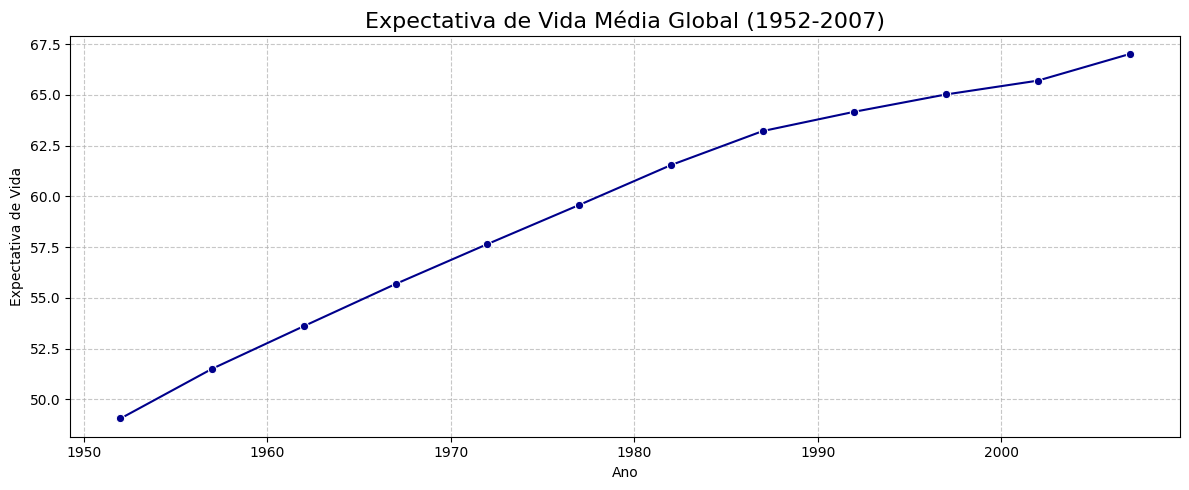

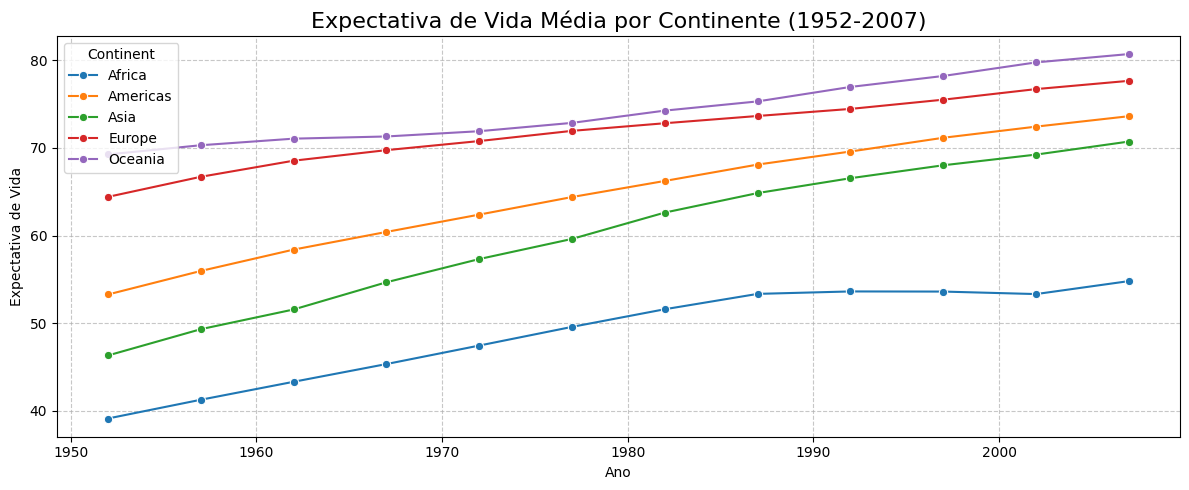

Analise: Vemos um aumento na expectativa de vida em todos os continentes. Fatores como sistema de saúde, distribuição de riquezas, conflitos levam a diferença por exemplo entre Europa / Oceania e Africa


In [49]:
# Cálculo da média global da expectativa de vida
df = juncao.copy()

md_global = df.groupby('year')['lifeExp'].mean().reset_index()

# Grafico
plot_line(
    data=md_global,
    x='year',
    y='lifeExp',
    titulo='Expectativa de Vida Média Global (1952-2007)',
    label_x='Ano',
    label_y='Expectativa de Vida',
    marker='o',
    color='darkblue'
)

# Cálculo da média por continente da expectativa de vida
md_continente = df.groupby(['year', 'continent'])['lifeExp'].mean().reset_index()

# Grafico
plot_line(
    data=md_continente,
    x='year',
    y='lifeExp',
    titulo='Expectativa de Vida Média por Continente (1952-2007)',
    label_x='Ano',
    label_y='Expectativa de Vida',
    hue='continent',
    marker='o'
)

print ("Analise: Vemos um aumento na expectativa de vida em todos os continentes. Fatores como sistema de saúde, distribuição de riquezas, conflitos levam a diferença por exemplo entre Europa / Oceania e Africa")



### 2.1 Expectativa de Vida Média Global (1952–2007)
- __Explicação de cada gráfico gerado:__  
O gráfico mostra a evolução da expectativa de vida média mundial no período de 1952 a 2007.

- __Justificativa da escolha do tipo de visualização:__  
O gráfico de linha permite um visualização fácil e prática de tendências ao longo do tempo.

- __Interpretação dos resultados observados:__  
Podemos notar um crescimento constante da expectativa de vida global, passando de menos de 50 anos em 1952 para cerca de 67 anos em 2007.

- __Discussão sobre **tendências globais** e **diferenças regionais**:__  
  - A tendência global reflete avanços em saúde, nutrição e saneamento.  
  - Não há rupturas significativas, indicando melhora gradual e sustentada em todas as regiões.

### 2.2 Expectativa de Vida Média por Continente (1952–2007)
- __Explicação de cada gráfico gerado:__  
O gráfico compara a evolução da expectativa de vida entre continentes entre o período de 1952 a 2007.

- __Justificativa da escolha do tipo de visualização:__  
Esse formato permite visualizar simultaneamente diferenças entre os continente e também da evolução ao longo do tempo.

- __Interpretação dos resultados observados:__  
Europa e Oceania apresentam as maiores expectativas de vida, enquanto a África mantém os menores índices, embora com avanço ao longo do período, podendo ser observado uma redução no crescimento entre o final da década de 80 e começo de 2000.

- __Discussão sobre **tendências globais** e **diferenças regionais**:__  
  - Persistem desigualdades entre os continentes, com destaque para continentes mais desenvolvidos como europa e oceania.  
  - Nítida diferença com o continente africano, que ainda apresenta menor taxa de crescimento

### 3 - Evolução do PIB per Capita Global x Continente

C:\Users\bruno\AppData\Local\Temp\ipykernel_33300\771639555.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=x, y=y, hue=hue, palette=palette)


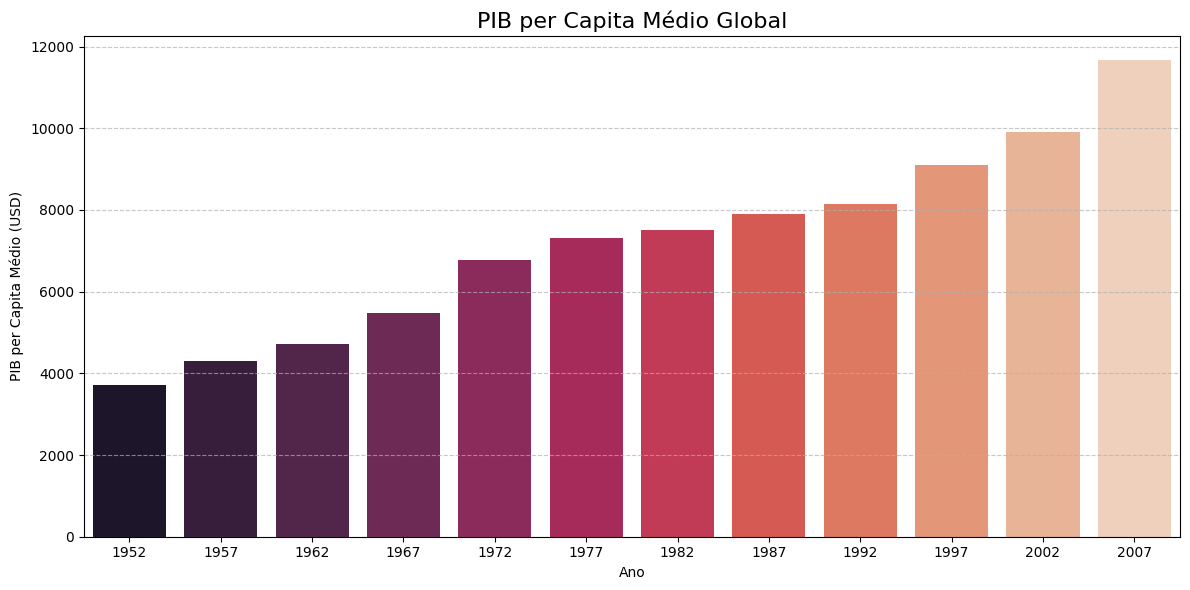

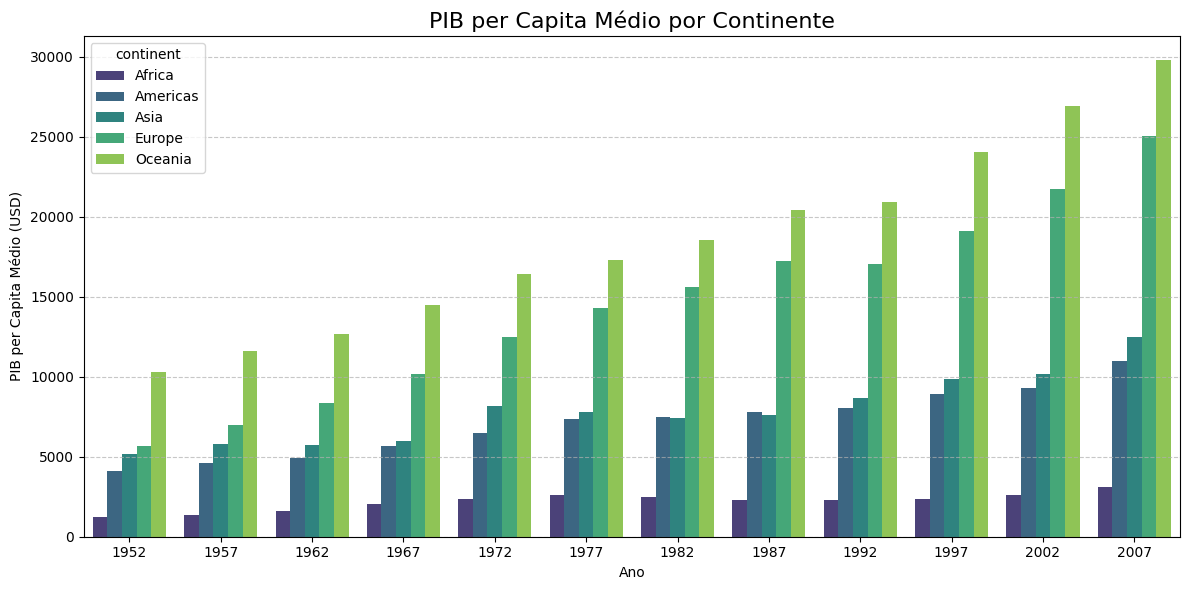

Analise: Ao longo do tempo houve também um aumento da produção de riquezas nos continentes, com um aumento mais significativo a partir dos anos 90 na Europa e Oceania. A industrialização, fatores politicos e qualidade de vida impactam na diferença entre os continentes


In [50]:
# Cálculo da média global da renda per capita
md_pib = df.groupby('year')['gdpPercap'].mean().reset_index()

# Grafico
plot_bar(
    data=md_pib,
    x='year',
    y='gdpPercap',
    titulo='PIB per Capita Médio Global',
    label_x='Ano',
    label_y='PIB per Capita Médio (USD)',
    palette='rocket',
)


# Cálculo da média por continente da renda per capita
md_pib_cont = df.groupby(['year', 'continent'])['gdpPercap'].mean().reset_index()

# Grafico
plot_bar(
    data=md_pib_cont,
    x='year',
    y='gdpPercap',
    hue='continent',
    titulo='PIB per Capita Médio por Continente',
    label_x='Ano',
    label_y='PIB per Capita Médio (USD)',
    palette='viridis',
)

print ("Analise: Ao longo do tempo houve também um aumento da produção de riquezas nos continentes, com um aumento mais significativo a partir dos anos 90 na Europa e Oceania. A industrialização, fatores politicos e qualidade de vida impactam na diferença entre os continentes")


### 3.1 PIB per Capita Médio Global
- __Explicação de cada gráfico gerado:__  
O gráfico mostra o crescimento do PIB per capita médio mundial de 1952 a 2007, em intervalos de 5 anos.

- __Justificativa da escolha do tipo de visualização:__  
O uso de barras facilita a comparação entre períodos e é de fácil leitura.

- __Interpretação dos resultados observados:__  
Há aumento contínuo da renda média global, de cerca de um pouco menos de 4000 USD em 1952 para mais de 11000 USD em 2007.
É possível notar um crescimento menor entre as décadas de 70 e 90, possívelmente justificados por crises econômicas e conflitos como a Guerra Fria 

- __Discussão sobre **tendências globais** e **diferenças regionais**:__  
  - O crescimento econômico global acompanha continua com tendência de alta ao longo do tempo.  
  

### 3.2 PIB per Capita Médio por Continente (1952–2007)
- __Explicação de cada gráfico gerado:__  
O gráfico agrupa os continentes para comparar o PIB médio entre 1952 e 2007.

- __Justificativa da escolha do tipo de visualização:__  
O agrupamento destaca contrastes econômicos regionais ao longo do tempo e facilita a interpretação

- __Interpretação dos resultados observados:__  
Novamente vemos Europa e Oceania mantendo os maiores valores, enquanto África apresenta os menores, com crescimento mais lento.
O continente Americano apresentou um aumento de 2 vezes no período, enquanto a Oceania, o melhor continente no indicador, triplicou a média de PIB per Capita desde 1952


- __Discussão sobre **tendências globais** e **diferenças regionais**:__  
  - As diferenças regionais são marcantes e persistentes, os continentes mais ricos tiveram um aumento significativo no PIB per capta, o que provavelmente manteve alta a qualidade de vida entre os países mais desenvolvidos.  
  - A desigualdade estrutural entre economias desenvolvidas e em desenvolvimento se mantém, mostrando, por exemplo, que o continente Africano é o que tem maior dificuldade na melhora do índice. Afetando a qualidade e expectativa de vida dos países do continente 

### 4 - Crescimento Populacional

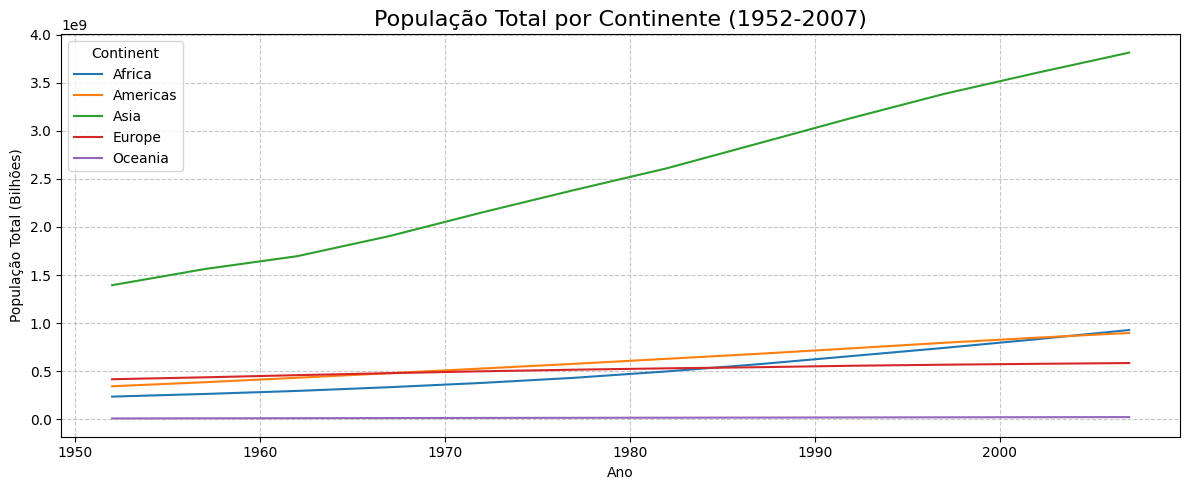

Alto aumento na população global, muito devido à questões como saúde e economia. Ásia historicamente possui as maiores taxas de natalidade 


In [51]:
# Cálculo da População Total por Continente e Ano
pop_cont = df.groupby(['year', 'continent'])['pop'].sum().reset_index()

# Grafico
plot_line(
    data=pop_cont,
    x='year',
    y='pop',
    titulo='População Total por Continente (1952-2007)',
    label_x='Ano',
    label_y='População Total (Bilhões)',
    hue='continent',
    loc_legenda='upper left'
)

print ("Alto aumento na população global, muito devido à questões como saúde e economia. Ásia historicamente possui as maiores taxas de natalidade ")

### 4. População Total por Continente (1952–2007)
- __Explicação de cada gráfico gerado:__  
O gráfico mostra o crescimento populacional em cada continente.

- __Justificativa da escolha do tipo de visualização:__  
As linhas permitem observar claramente o ritmo de crescimento ao longo das décadas.

- __Interpretação dos resultados observados:__  
A Ásia lidera em população, tendo mais que dobrado a população desde 1952. Provavelmente puxados principalmente por China e Índia. 
Seguida pela África, que apresentou um crescimento acelerado no período, apesar dos índices menores de GDP e expectativa de vida.

- __Discussão sobre **tendências globais** e **diferenças regionais**:__  
  - Com a China suspendendo as restrições de natalidade nos últimos anos e a Índia se tornando o país mais populoso do mundo, a tendência é que a Asia continue tendo a maior concentração demográfica.  
  - A África tende a crescer mais rapidamente, com impacto em políticas globais de desenvolvimento. A melhora no PIB per capta e expectativa de vida também deve auxiliar o crescimento populacional  

### 5 - Top 5 paises mais ricos e mais pobres (2007)
- Esta é uma análise que identifica os países de maior e menor desempenho em 2007.

C:\Users\bruno\AppData\Local\Temp\ipykernel_33300\771639555.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=x, y=y, hue=hue, palette=palette)


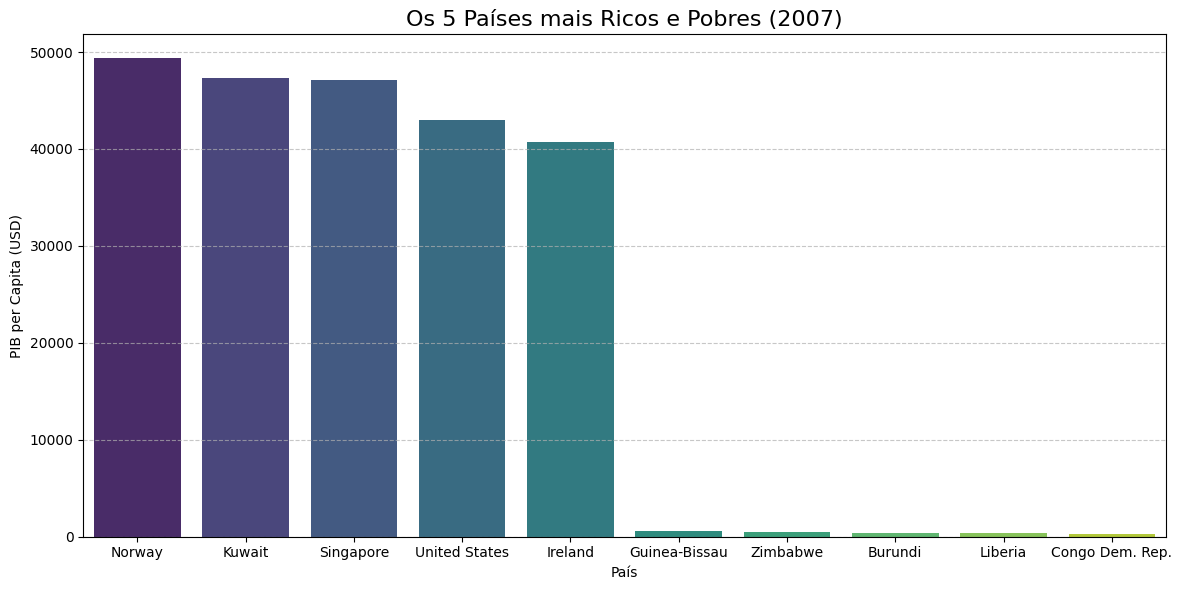

Análise: O gráfico apresenta o grande contraste entre os paises mais ricos e mais pobres. Alguns fatos pode explicar: economia inovadora, política estabilizada e recursos naturais (petroleo por exemplo)


In [52]:
# Selecionar dados de 2007
df_2007 = df[df['year'] == 2007]

# Organizar e coletar os 5 primeiros mais ricos
ricos = df_2007.sort_values(by='gdpPercap', ascending=False).head(5)

# Organizar e coletar os 5 primeiros mais pobres
pobres = df_2007.sort_values(by='gdpPercap', ascending=False).tail(5)

# Criar novo df com os dados filtrados
df_lista = pd.concat([ricos, pobres])

# Grafico
plot_bar(
    data=df_lista,
    x='country',
    y='gdpPercap',
    titulo='Os 5 Países mais Ricos e Pobres (2007)',
    label_x='País',
    label_y='PIB per Capita (USD)'
)

print ("Análise: O gráfico apresenta o grande contraste entre os paises mais ricos e mais pobres. Alguns fatos pode explicar: economia inovadora, política estabilizada e recursos naturais (petroleo por exemplo)")

### 5. Os 5 Países Mais Ricos e Pobres (2007)
- __Explicação de cada gráfico gerado:__  
O gráfico compara o PIB per capita dos cinco países mais ricos e mais pobres.

- __Justificativa da escolha do tipo de visualização:__  
A visualização em barras facilita a comparação direta entre extremos econômicos.

- __Interpretação dos resultados observados:__  
Noruega lidera o ranking com quase 50000 USD, enquanto os países mais pobres, como Congo e Libéria, não ultrapassam 500 USD.
O gráfico reforça o entendimento entre as diferenças regionais, mostrando que os países mais ricos estão na Europa ou ligados a exploração de Petróleo. Enquanto os mais pobres, no continente Africano

- __Discussão sobre **tendências globais** e **diferenças regionais**:__  
  - As disparidades econômicas são amplas e persistentes, reforçando as desigualdades que já eram visíveis há décadas, mostrando como a desigualdade entre os países continua evidente. 

### 6 - Numero de Paises x PIB Per Capita
- Comparar o número de países e o PIB Médio por Continente

C:\Users\bruno\AppData\Local\Temp\ipykernel_33300\771639555.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=x, palette=palette, order=order)


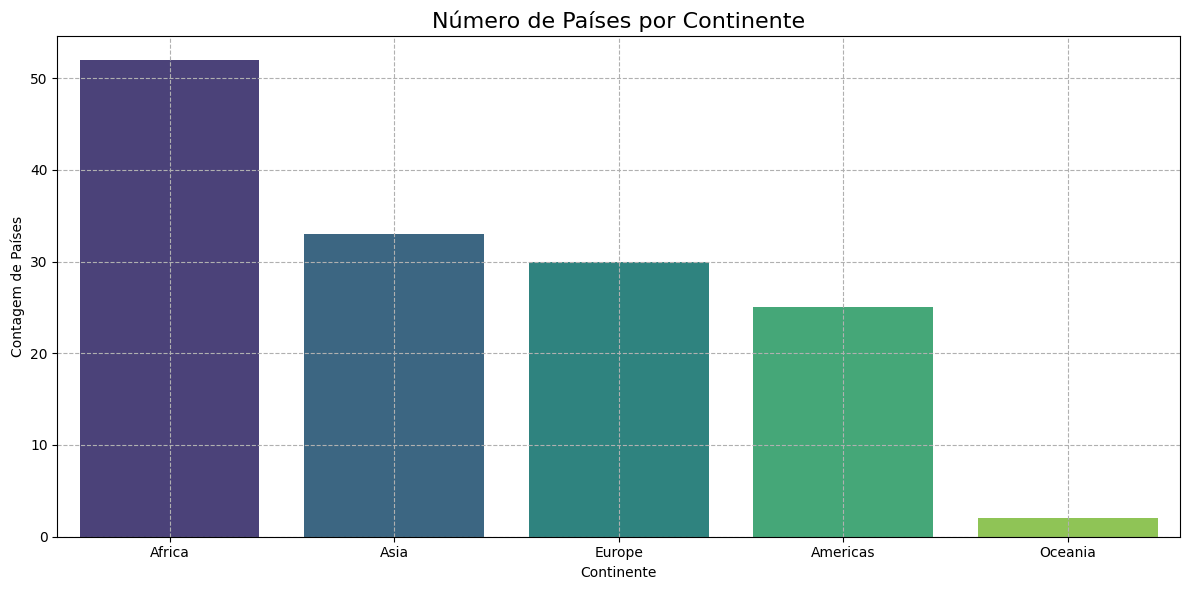

C:\Users\bruno\AppData\Local\Temp\ipykernel_33300\771639555.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=x, y=y, hue=hue, palette=palette)


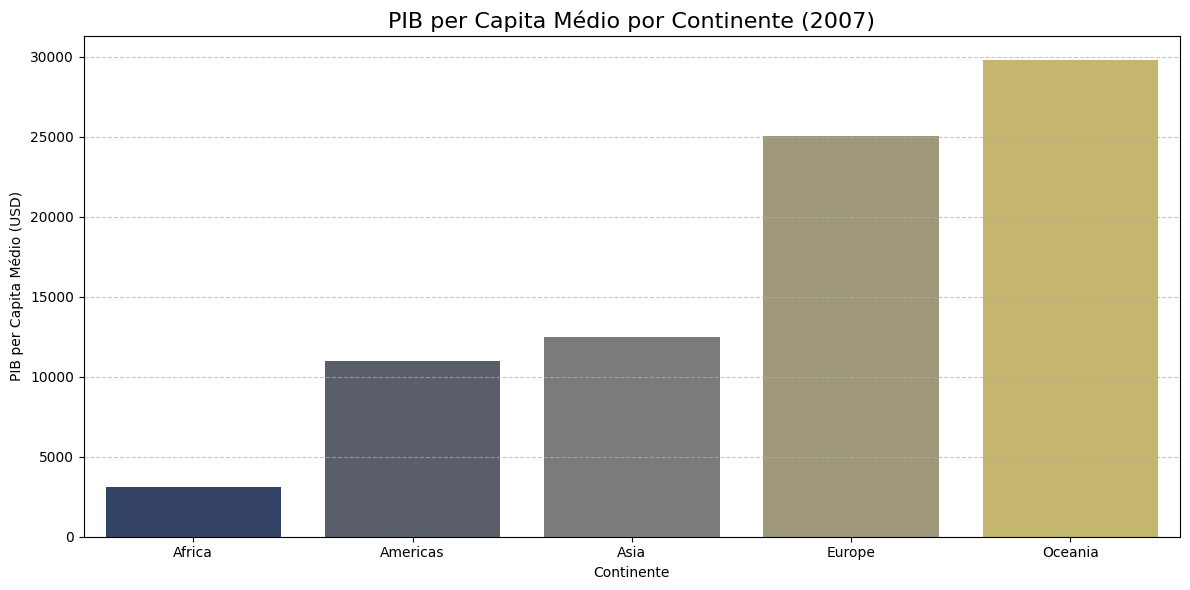

Analise: Alem do fator quantidade de paises, colocamos uma analise de continentes com mais paises não possuirem mais riquezas. Muito pelo fato da distribuição de renda não serem iguais, diversidades culturais que levam a conflitos e histórico de colonizações


In [53]:
# Selecionar dados de 2007
df_2007 = df[df['year'] == 2007]

# Grafico para total de paises por continente
plot_count(
    data=df_2007,
    x='continent',
    titulo='Número de Países por Continente',
    label_x='Continente',
    label_y='Contagem de Países',
    palette='viridis'
)


# Cálculo da média por continente da renda per capita em 2007
pib_cont= df_2007.groupby('continent')['gdpPercap'].mean().reset_index()

# Grafico
plot_bar(
    data=pib_cont,
    x='continent',
    y='gdpPercap',
    titulo='PIB per Capita Médio por Continente (2007)',
    label_x='Continente',
    label_y='PIB per Capita Médio (USD)',
    palette='cividis',
)

print("Analise: Alem do fator quantidade de paises, colocamos uma analise de continentes com mais paises não possuirem mais riquezas. Muito pelo fato da distribuição de renda não serem iguais, diversidades culturais que levam a conflitos e histórico de colonizações")

### 6.1 Número de Países por Continente
- __Explicação de cada gráfico gerado:__  
O gráfico exibe a quantidade de países em cada continente.

- __Justificativa da escolha do tipo de visualização:__  
Barras são eficientes para comparar categorias simples e de fácil leitura.

- __Interpretação dos resultados observados:__  
A África possui o maior número de países (mais de 50). Possivelmente decorrente de tantos conlfitos e explorações de nações mais desenvolvidas nos períodos coloniais, como Portugal, França e Inglaterra
A Oceania apresenta a menor quantidade de países

- __Discussão sobre **tendências globais** e **diferenças regionais**:__  
  - A África se destaca por sua fragmentação de território, o que afeta o crescimento econômico do continente 

### 6.2. PIB per Capita Médio por Continente (2007)
- __Explicação de cada gráfico gerado:__  
O gráfico apresenta o PIB per capita médio de cada continente em 2007.

- __Justificativa da escolha do tipo de visualização:__  
As barras permitem comparar níveis econômicos regionais em um único ponto temporal, alinhado com o último gráfico da quantidade de países por continente.

- __Interpretação dos resultados observados:__  
Oceania e Europa exibem as maiores médias, enquanto África permanece com a menor. Mesmo sendo opostos na análise anterior, sobre a quantidade de países em cada continente

- __Discussão sobre **tendências globais** e **diferenças regionais**:__  
  - As diferenças de renda per capita mantêm-se amplas e o desenvolvimento econômico continua desigual entre continentes. Mantendo a tendência observada desde o inicio da década de 50 

### 7 - Correlacao entre Indicadores (2007)
- Apresentar as correlações entre as variáveis numéricas (Expectativa de Vida, PIB per Capita e Populacao)

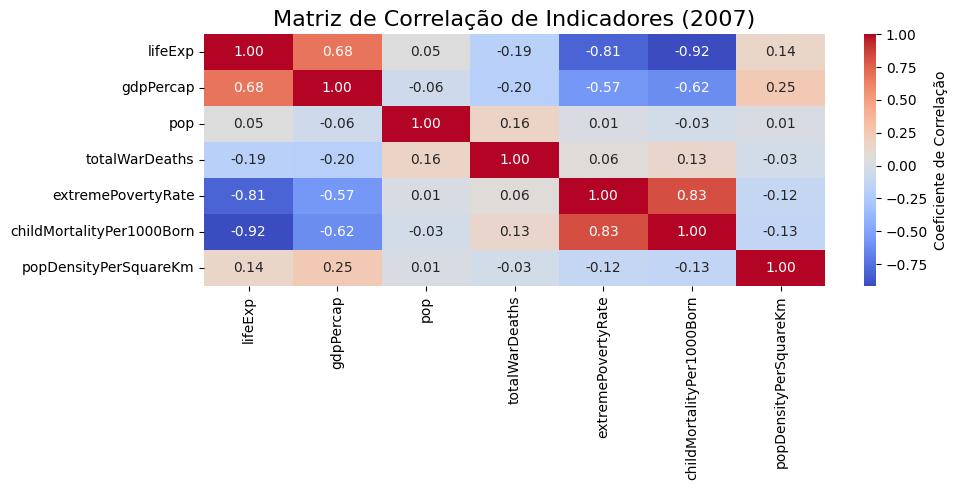

Analise: O mapa mostra a forte correlação entre expectativa de vida e renda per capita. Há a possibilidade de investimentos em infra-estrutura e serviços públicos 


In [58]:
# Selecionar dados de 2007
df_2007 = df[df['year'] == 2007]

# Correlacionar os campos numericos (Expectativa de Vida, Renda Per Capita, População)
df_corr = df_2007[['lifeExp', 'gdpPercap', 'pop', 'totalWarDeaths', 'extremePovertyRate', 'childMortalityPer1000Born', 'popDensityPerSquareKm']].corr().round(4)

# Grafico
plot_heat(
    data=df_corr,
    titulo='Matriz de Correlação de Indicadores (2007)',
    cmap='coolwarm',
    cbar_label='Coeficiente de Correlação',
    fmt=".2f",
    figsize=(10, 5)
)

print(f"Analise: O mapa mostra a forte correlação entre expectativa de vida e renda per capita. Há a possibilidade de investimentos em infra-estrutura e serviços públicos ")

### 8 - Relacao PIB x Expectativa de Vida
- Analise Riqueza x Expectativa de Vida por pais no ano de 2007

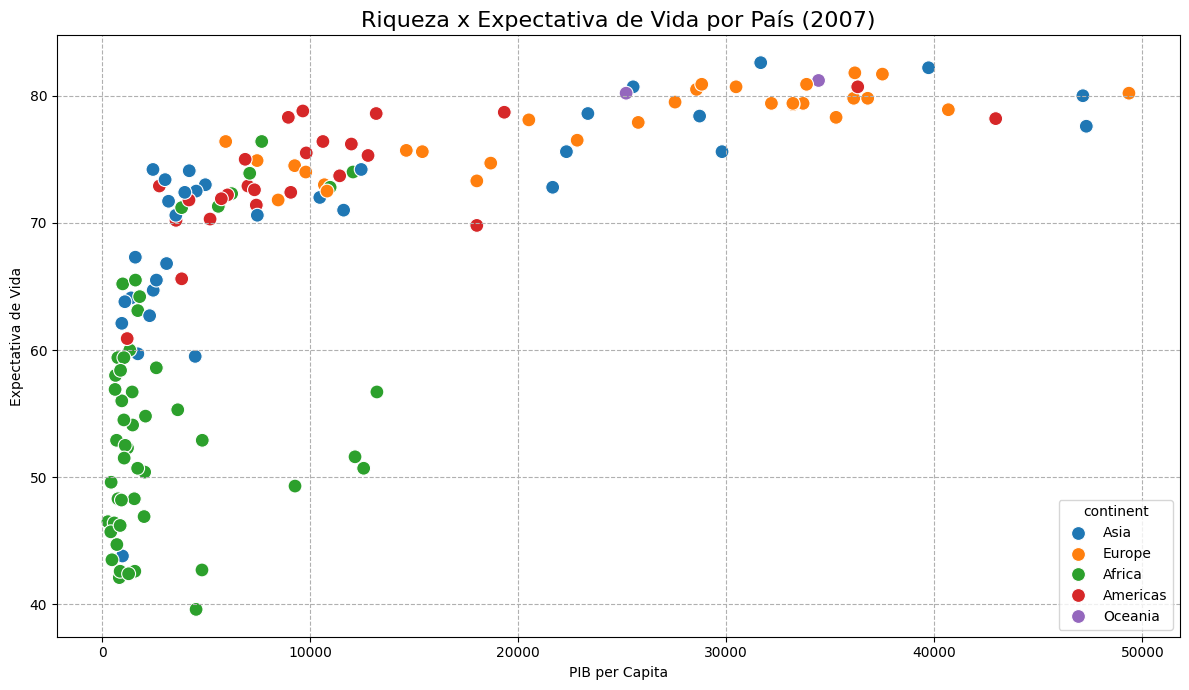

Analise: Mais uma evidencia da grande maioria dos paises africanos concentrados na escala mais baixa de expectativa de vida e renda per capita. Falta de recursos, doenças e qualidade de vida levam a esta situação para os paises pobres


In [55]:
# Selecionar dados de 2007
df_2007 = df[df['year'] == 2007]

# Gráfico
plot_scatter(
    data=df_2007,
    x='gdpPercap',
    y='lifeExp',
    titulo='Riqueza x Expectativa de Vida por País (2007)',
    label_x='PIB per Capita',
    label_y='Expectativa de Vida',
    hue='continent',
    palette='tab10',
    tamanho_ponto=100,
    legenda_titulo='Continente',
    loc_legenda='lower right'
)

print("Analise: Mais uma evidencia da grande maioria dos paises africanos concentrados na escala mais baixa de expectativa de vida e renda per capita. Falta de recursos, doenças e qualidade de vida levam a esta situação para os paises pobres")

### 9 - Taxa de Crescimento Populacional por Continente
- Calculo do crescimento populacional em cada continente entre 1952 e 2007

C:\Users\bruno\AppData\Local\Temp\ipykernel_33300\771639555.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=x, y=y, hue=hue, palette=palette)


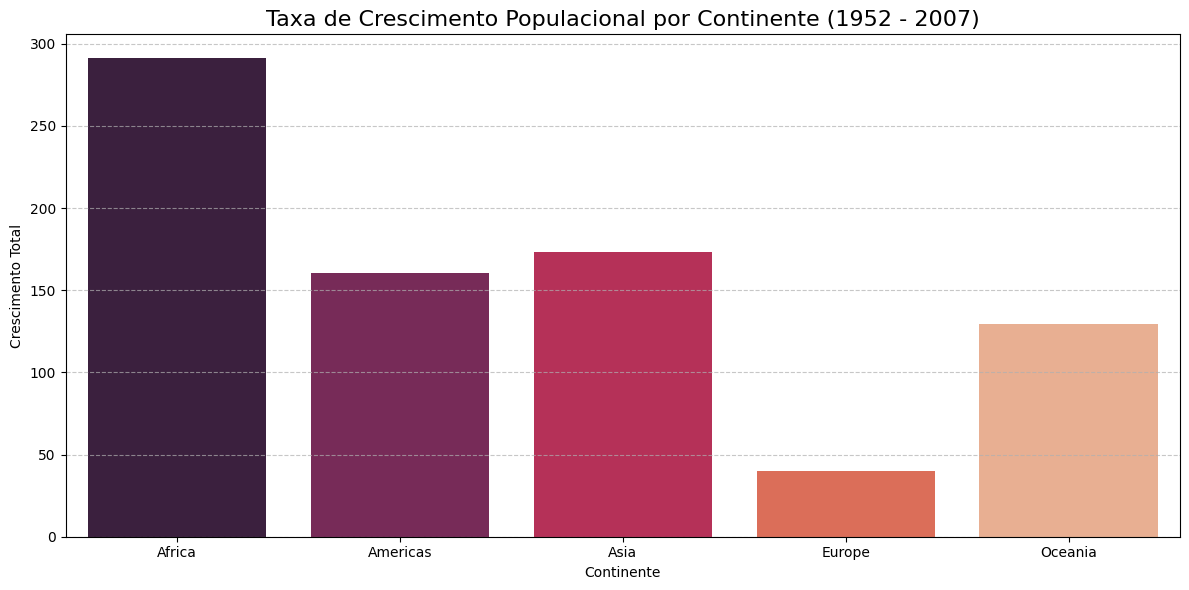

Analise: Apesar de todo problema com continente africano, observamos um crescimento da população mais significativo. Avanços na saúde, saneamento explicam essa taxa. A preocupação fica com a Europa, com o envelhecimento de sua população


In [56]:
# Calculo da populacao entre 1952 e 2007
pop_inicio = df[df['year'] == 1952].groupby('continent')['pop'].sum()
pop_fim = df[df['year'] == 2007].groupby('continent')['pop'].sum()

# Calculo da taxa de crescimento
cresc_pop = ((pop_fim - pop_inicio) / pop_inicio * 100).reset_index(name='tx_cresc')

# Gráfico
plot_bar(
    data=cresc_pop,
    x='continent',
    y='tx_cresc',
    titulo='Taxa de Crescimento Populacional por Continente (1952 - 2007)',
    label_x='Continente',
    label_y='Crescimento Total',
    palette='rocket',
)


print("Analise: Apesar de todo problema com continente africano, observamos um crescimento da população mais significativo. Avanços na saúde, saneamento explicam essa taxa. A preocupação fica com a Europa, com o envelhecimento de sua população")

### 10 - Expectativa de Vida por Regiao / Ano
- Avaliacao da media e evolucao da Expectativa de Vida por continente e por ano

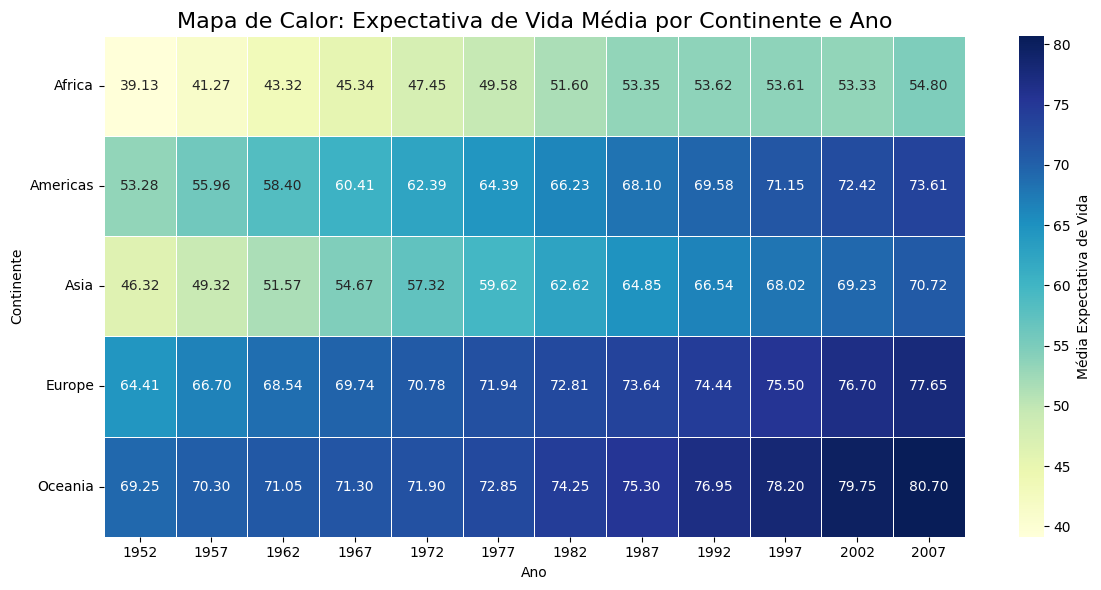

Analise: Importante destaque para a expectativa média de todos os continentes evoluiram ao longo do período


In [57]:
# Organizar e calcular a media da Expectativa de Vida por continente e ano
media_vida = df.groupby(['continent', 'year'])['lifeExp'].mean().unstack(level='year')

# Grafico
plot_heat(
    data=media_vida,
    titulo='Mapa de Calor: Expectativa de Vida Média por Continente e Ano',
    cmap='YlGnBu',
    cbar_label='Média Expectativa de Vida',
    fmt=".2f",
    xlabel='Ano',
    ylabel='Continente',
    linewidths=0.5,
)

print("Analise: Importante destaque para a expectativa média de todos os continentes evoluiram ao longo do período")

In [58]:
selected_year = 2002
selected_metric = 'gdpPercap'

df_year = df[df['year'] == selected_year].copy()

q = df_year[selected_metric].quantile([0.02, 0.1, 0.25, 0.5, 0.75, 0.9, 0.98]).values

bins = np.concatenate(([-float('inf')], q, [float('inf')]))

labels = []
for i in range(len(bins) - 1):
    low = bins[i]
    high = bins[i + 1]
    if i == 0:
        labels.append(f'menor que {int(round(high)):,}')
    elif i == len(bins) - 2:
        labels.append(f'maior que {int(round(low)):,}')
    else:
        labels.append(f'entre {int(round(low)):,} e {int(round(high)):,}')

df_year['categoria'] = pd.cut(df_year[selected_metric], bins=bins, labels=labels, include_lowest=True)

reds = px.colors.sequential.Reds
idxs = [int(round(i)) for i in np.linspace(2, len(reds) - 2, len(labels))]
color_list = [reds[i] for i in idxs]

color_map = dict(zip(labels, color_list))

fig = px.choropleth(
    df_year,
    locations='country',
    locationmode='country names',
    color='categoria',
    hover_name='country',
    hover_data={k: True for k in df.columns},
    color_discrete_map=color_map,
    category_orders={'categoria': labels},
    title=f'{selected_metric} em {selected_year}',
)

fig.add_trace(go.Scattergeo(
    lon=[0],
    lat=[100000],
    mode='markers',
    marker=dict(symbol='square', color='Black', size=11.5),
    name='Sem informação',
    showlegend=True,
    hoverinfo='skip'
))

fig.update_layout(
    width=1000,
    margin=dict(l=1, r=10, t=60, b=10),
    legend=dict(title='Categoria')
)

fig.update_geos(
    projection_scale=0.9,
    showcountries=True,
    showcoastlines=True,
    landcolor='Black'
)

fig.show()

C:\Users\bruno\AppData\Local\Temp\ipykernel_33300\339322475.py:29: DeprecationWarning: The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.
  fig = px.choropleth(


### 11. Evolução da taxa de mortalidade infantil global

C:\Users\bruno\AppData\Local\Temp\ipykernel_33300\771639555.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




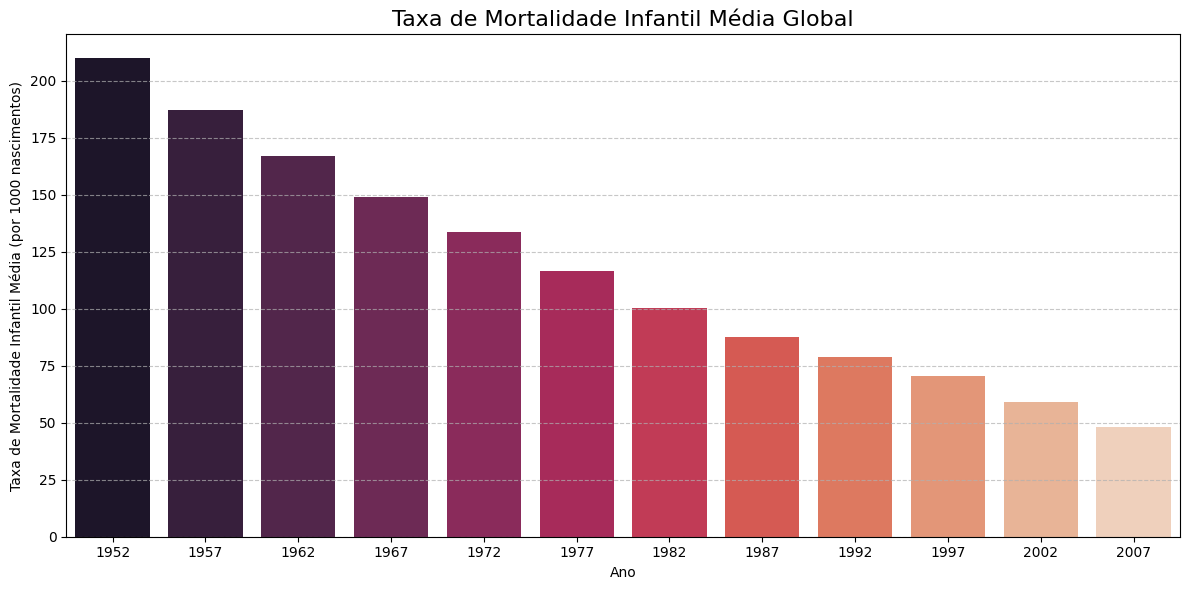

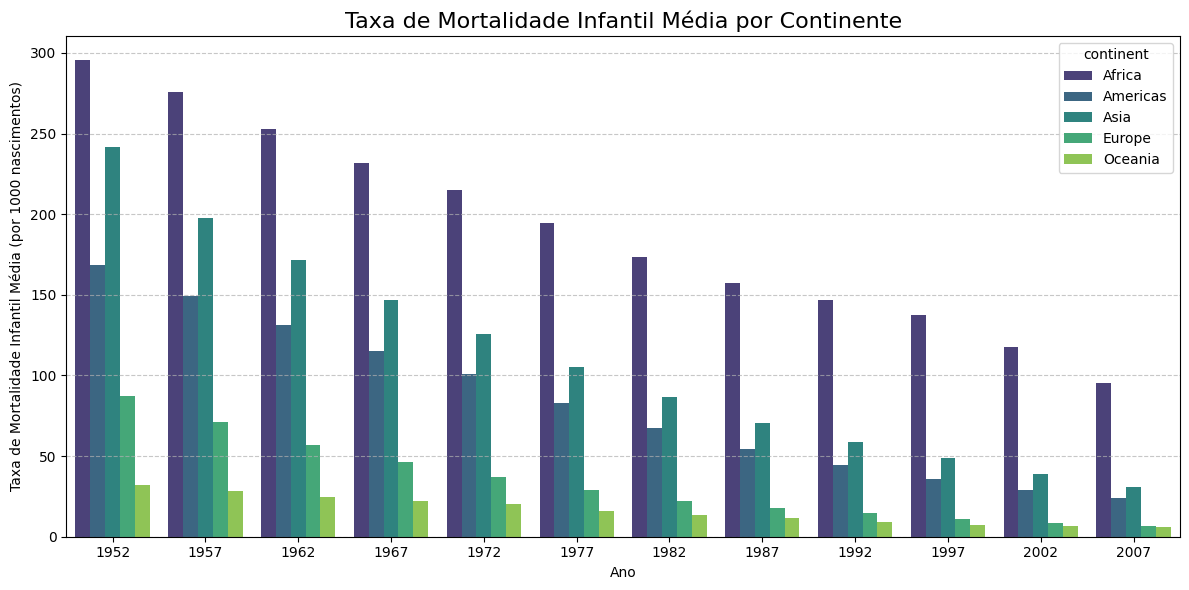

In [77]:
# Cálculo da média global da renda per capita
md_pib = df.groupby('year')['childMortalityPer1000Born'].mean().reset_index()

# Grafico
plot_bar(
    data=md_pib,
    x='year',
    y='childMortalityPer1000Born',
    titulo='Taxa de Mortalidade Infantil Média Global',
    label_x='Ano',
    label_y='Taxa de Mortalidade Infantil Média (por 1000 nascimentos)',
    palette='rocket',
)


# Cálculo da média por continente da renda per capita
md_pib_cont = df.groupby(['year', 'continent'])['childMortalityPer1000Born'].mean().reset_index()

# Grafico
plot_bar(
    data=md_pib_cont,
    x='year',
    y='childMortalityPer1000Born',
    hue='continent',
    titulo='Taxa de Mortalidade Infantil Média por Continente',
    label_x='Ano',
    label_y='Taxa de Mortalidade Infantil Média (por 1000 nascimentos)',
    palette='viridis',
)


- __Explicação de cada gráfico gerado:__ Os dois gráficos trazem para nós a média de mortes infantis por continente por ano. O primeiro gráfico trás um acumulado global, enquanto o segundo, um comparativo por continente.
- __Justificativa da escolha do tipo de visualização:__ O gráfico de barras foi escolhido para conseguirmos ter a visão de progressão do indicador ao longo dos anos e conseguir traçar comparativos entre os continentes num mesmo ano.
- __Interpretação dos resultados observados:__  Ao longo do tempo, houve um decaimento significativo na taxa de mortalidade infantil em todos os continentes, refletindo avanços na saúde pública, saneamento básico e acesso a cuidados médicos. Fatores como vacinação, melhoria na nutrição e educação também contribuíram para essa tendência positiva. 
- __Discussão sobre **tendências globais** e **diferenças regionais**:__
    - Analisando o gráfico de taxa de mortalidade infantil média por continente, podemos observar que a África apresenta a maior taxa ao longo do período, embora tenha havido uma redução significativa. Isso pode ser atribuído a desafios persistentes, como acesso limitado a serviços de saúde, pobreza e condições sanitárias inadequadas.
    - Por outro lado, continentes como Europa e Oceania mostram taxas muito mais baixas, refletindo melhores condições socioeconômicas e sistemas de saúde mais desenvolvidos.

### 12. Rank da taxa de queda da mortalidade infantil a cada 1000 nascimentos no período

C:\Users\bruno\AppData\Local\Temp\ipykernel_33300\771639555.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




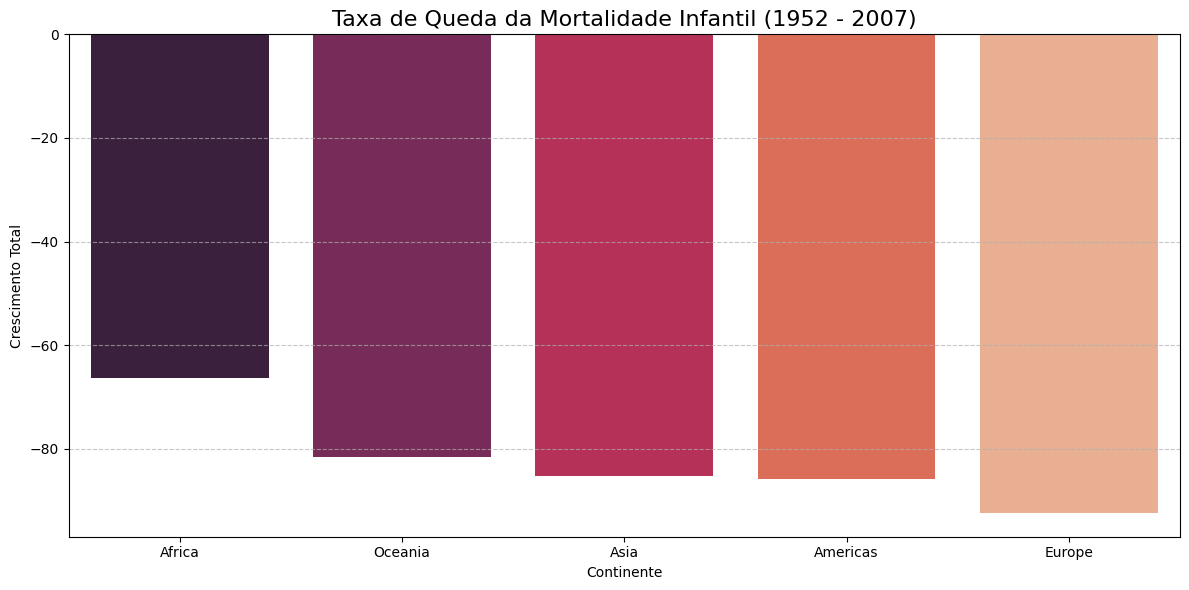

In [81]:
# Calculo da populacao entre 1952 e 2007
pop_inicio = df[df['year'] == 1952].groupby('continent')['childMortalityPer1000Born'].sum()
pop_fim = df[df['year'] == 2007].groupby('continent')['childMortalityPer1000Born'].sum()

# Calculo da taxa de queda da mortalidade infantil
cresc_pop = ((pop_fim - pop_inicio) / pop_inicio * 100).reset_index(name='tx_cresc').sort_values(by='tx_cresc', ascending=False)

# Gráfico
plot_bar(
    data=cresc_pop,
    x='continent',
    y='tx_cresc',
    titulo='Taxa de Queda da Mortalidade Infantil (1952 - 2007)',
    label_x='Continente',
    label_y='Crescimento Total',
    palette='rocket',
)


- __Explicação de cada gráfico gerado:__ O gráfico nos trás a visão da taxa de redução de mortalidade em cada continente, com o objetivo de trazer pra uma mesma "base" a comparação da redução em cada continente.
- __Justificativa da escolha do tipo de visualização:__ O gráfico de barras foi escolhido para conseguirmos traçar comparativos entre as taxas dos continentes ao longo do período estudado.
- __Interpretação dos resultados observados:__  Em todos os continentes tivemos uma queda significativa na taxa de mortalidade infantil, a Europa liderando a redução com 92% e a África em último lugar com uma redução de 62%
- __Discussão sobre **tendências globais** e **diferenças regionais**:__
    - Analisando a taxa de queda para cada continente, observamos que, apesar da África ter o maior valor absoluto de queda da mortalidade, ela foi o continente que menos caiu, quando comparados com outros continentes. \n Isso tambéwm corrobora que o continente africano ainda enfrenta desafios significativos em termos de saúde pública, acesso a cuidados médicos e condições socioeconômicas.
    - Por outro lado, continentes como Europa e Oceania, que já possuíam valores absolutos de mortalidade infantil relativamente baixos em 1952, conseguiram reduzir ainda mais esses números, refletindo avanços contínuos em seus sistemas de saúde e qualidade de vida e gerando um impacto muito maior na redução da taxa de mortalidade. Explicando: 
        - Europa em 1952 tinha 2615 mortes registradas contra 200 em 2007, com uma redução absoluta de aproximadamente 2400 mortes
        - Africa em 1952 tinha 14495 mortes registradas contra 4877 em 2007, com uma redução absoluta de aproximadamente 9600 mortes
        - Comparando os dois resultados, a África teve a maior redução absoluta, porém a Europa lidera o indicador pois o impacto proporcional da redução da Europa é muito superior em relação ao da África.

### 13. Relação entre o PIB e a mortalidade infantil

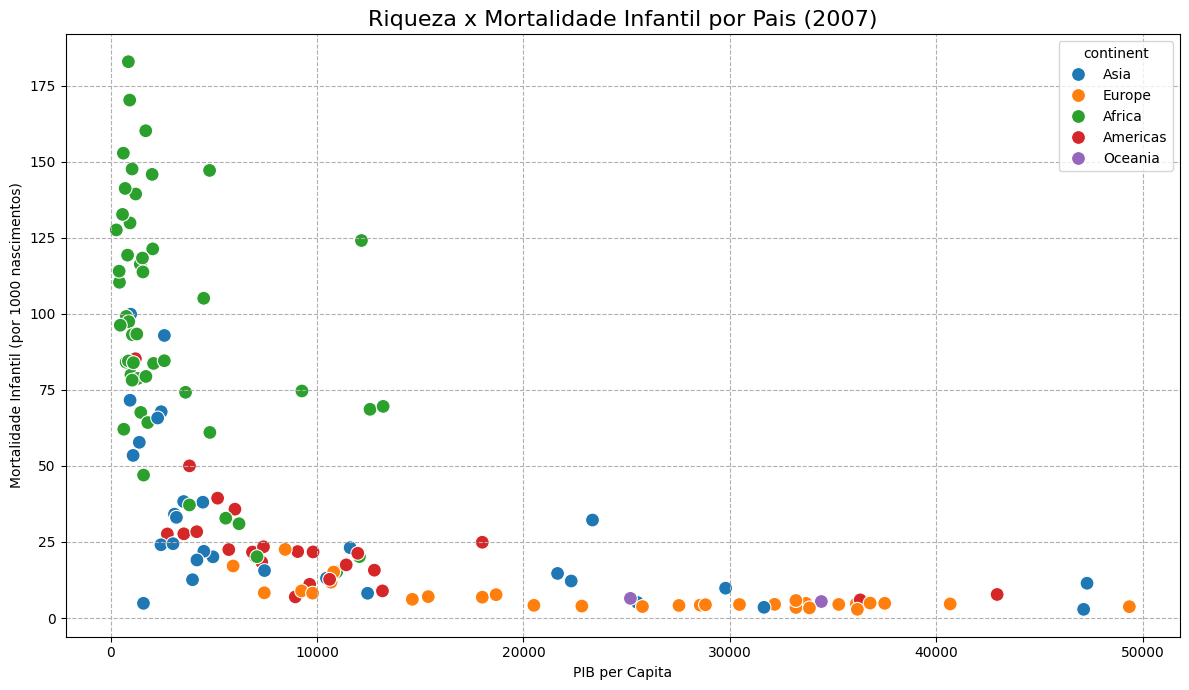

In [ ]:
# Selecionar dados de 2007
df_2007 = df[df['year'] == 2007]

# Gráfico
plot_scatter(
    data=df_2007,
    x='gdpPercap',
    y='childMortalityPer1000Born',
    titulo='Riqueza x Mortalidade Infantil por Pais (2007)',
    label_x='PIB per Capita',
    label_y='Mortalidade Infantil (por 1000 nascimentos)',
    hue='continent',
    palette='tab10',
    tamanho_ponto=100,
    legenda_titulo='Continente',
    loc_legenda='lower right'
)

- __Explicação de cada gráfico gerado:__ O gráfico nos trás a visão da distribuição da taxa de mortalidade infantil de acordo com a renda per capta no ano de 2007. O objetivo é fazer um apanhado final e visualizar a correlação média entre esses 2 indicadores.
- __Justificativa da escolha do tipo de visualização:__ O gráfico foi escolhido para termos a visualização da relação de cada país não só com o PIB mas entre si também. Além disso, o gráfico permite que vejamos a tendência dessa relação dos 2 indicadores, que já foi determinada como média no gráfico de correlação
- __Interpretação dos resultados observados:__  Mais uma evidencia da grande maioria dos paises africanos concentrados no ponto mais alto da mortalidade infantil e no canto esquerdo do mapa, indicando que o PIB é bem baixo, com raras exceções.
- __Discussão sobre **tendências globais** e **diferenças regionais**:__
    - Na maioria dos países onde o PIB é mais próximo de zero, a taxa de mortalidade infantil é extremamente alta, em comparação com os que tem um PIB maior.
    - Por outro lado, em relação ao paises que tem PIB per capta acima de 10.000 USD, a taxa de mortalidade infantil se mantém baixa e estável, indicando que outros fatores além da riqueza podem influenciar nessa questão.

### 14. Evolução da Extrema Pobreza

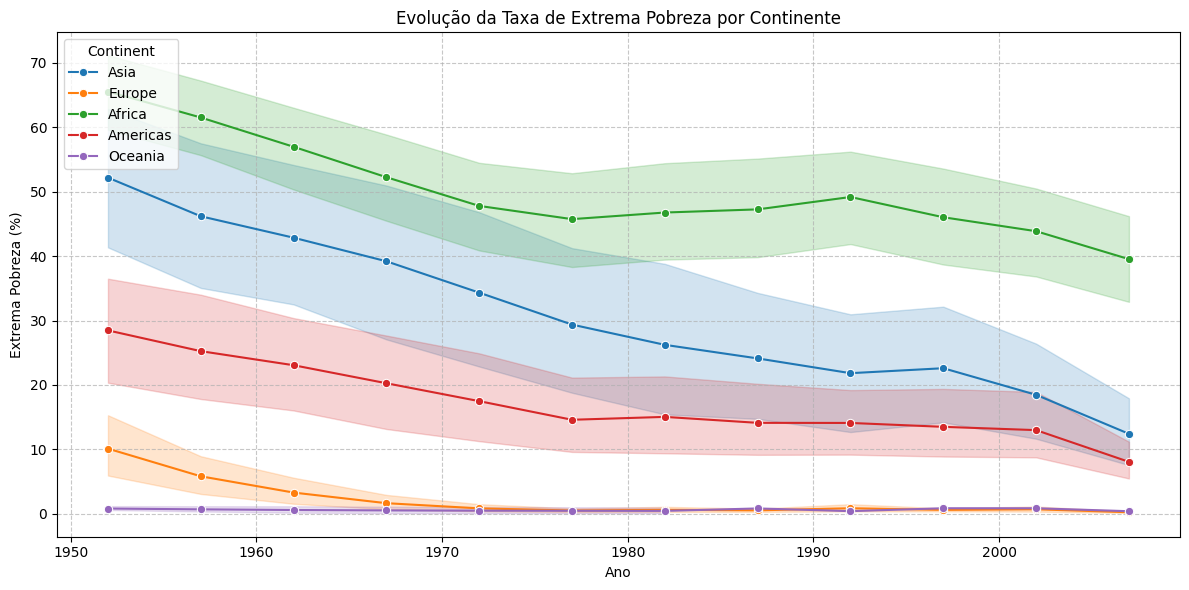

In [80]:
plot_line(
    data=df,
    x='year',
    y='extremePovertyRate',
    hue='continent',
    marker='o',
    titulo='Evolução da Taxa de Extrema Pobreza por Continente',
    label_x='Ano',
    label_y='Extrema Pobreza (%)',
    figsize=(12,6),
    fontsize=12,
    loc_legenda='upper left'
)

- __Explicação de cada gráfico gerado:__
O gráfico mostra a evolução da extrema pobreza ao longo dos anos em cada continente, permitindo acompanhar tendências temporais e comparar regiões.

- __Justificativa da escolha do tipo de visualização:__
O gráfico de linha facilita visualizar a evolução ao longo do tempo e comparar trajetórias entre continentes.

- __Interpretação dos resultados observados:__
Observa-se uma redução gradual da extrema pobreza global, com África mantendo os níveis mais altos e Europa e América do Norte com taxas muito baixas.

- __Discussão sobre **tendências globais** e **diferenças regionais**:__
    - Globalmente, a pobreza extrema diminuiu ao longo das décadas.
    - África apresenta os maiores desafios, enquanto regiões mais desenvolvidas mantêm taxas baixas.

C:\Users\bruno\AppData\Local\Temp\ipykernel_20744\1043919228.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=x, y=y, hue=hue, palette=palette)


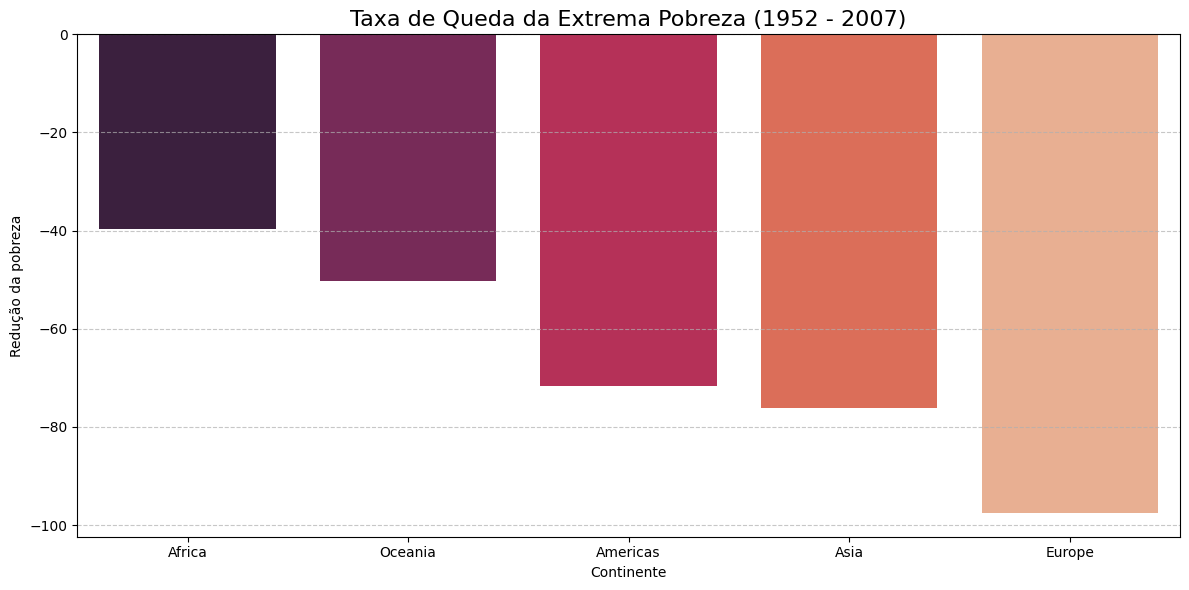

In [81]:
# Cálculo da extrema pobreza entre 1952 e 2007
pobreza_inicio = df[df['year'] == 1952].groupby('continent')['extremePovertyRate'].mean()
pobreza_fim = df[df['year'] == 2007].groupby('continent')['extremePovertyRate'].mean()

# Cálculo da taxa de queda da extrema pobreza
tx_queda = (-(pobreza_inicio - pobreza_fim) / pobreza_inicio * 100).reset_index(name='tx_queda').sort_values(by='tx_queda', ascending=False)

# Gráfico
plot_bar(
    data=tx_queda,
    x='continent',
    y='tx_queda',
    titulo='Taxa de Queda da Extrema Pobreza (1952 - 2007)',
    label_x='Continente',
    label_y='Redução da pobreza',
    palette='rocket',
)

C:\Users\bruno\AppData\Local\Temp\ipykernel_20744\1043919228.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=x, y=y, hue=hue, palette=palette)


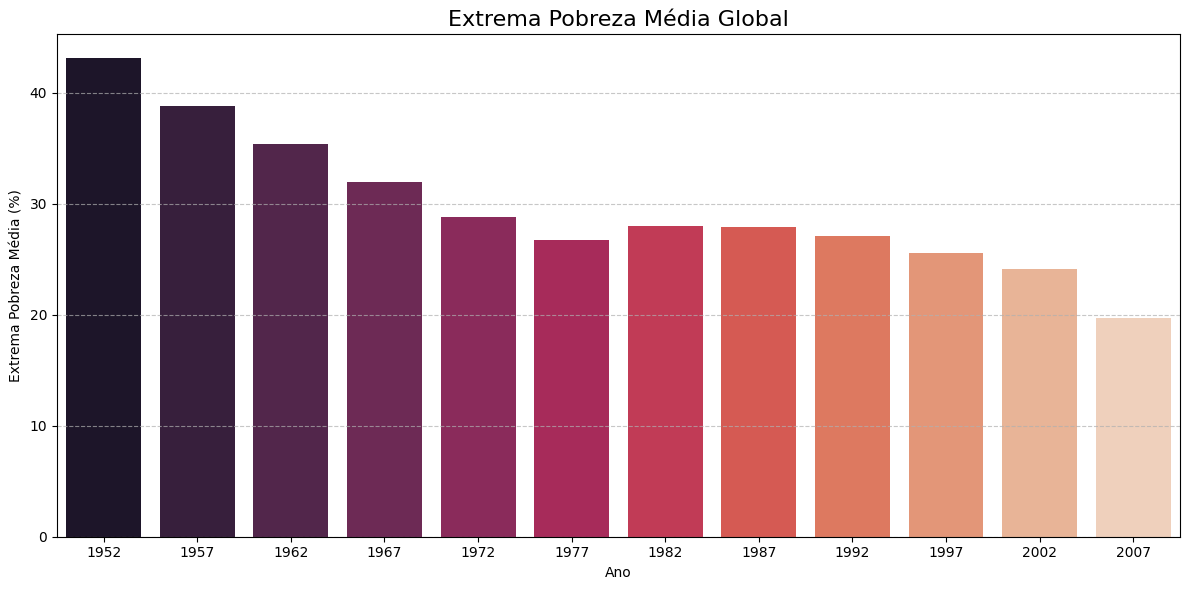

In [ ]:
# Cálculo da média global da extrema pobreza
md_pobreza = df.groupby('year')['extremePovertyRate'].mean().reset_index()

# Gráfico
plot_bar(
    data=md_pobreza,
    x='year',
    y='extremePovertyRate',
    titulo='Extrema Pobreza Média Global',
    label_x='Ano',
    label_y='Extrema Pobreza Média (%)',
    palette='rocket',
)

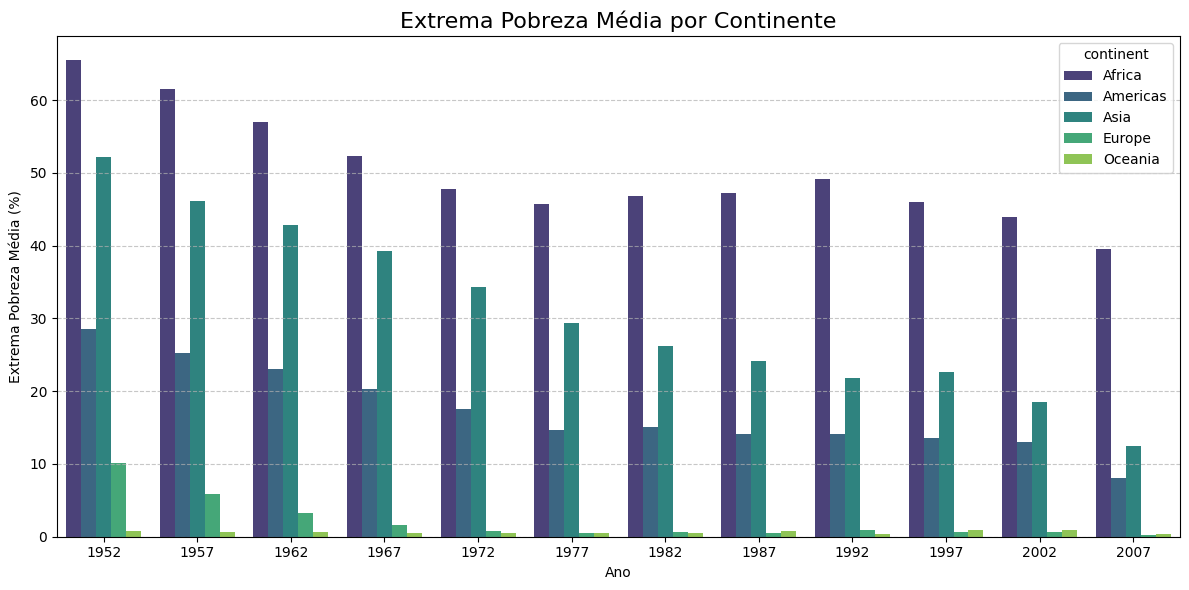

In [ ]:
# Cálculo da média por continente da extrema pobreza
pobreza_groupby = df.groupby(['year', 'continent'])['extremePovertyRate'].mean().reset_index()

# Gráfico
plot_bar(
    data=pobreza_groupby,
    x='year',
    y='extremePovertyRate',
    hue='continent',
    titulo='Extrema Pobreza Média por Continente',
    label_x='Ano',
    label_y='Extrema Pobreza Média (%)',
    palette='viridis',
)

### 15. Relação entre a mortalidade infantil e a extrema pobreza

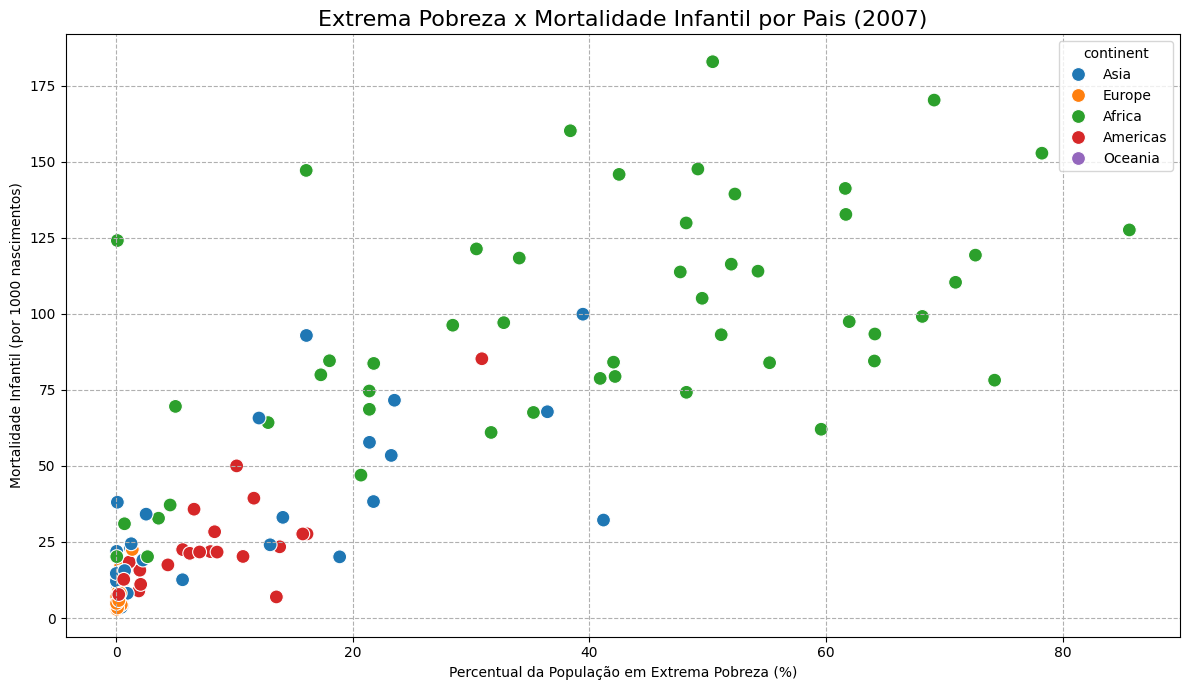

In [ ]:
# Selecionar dados de 2007
df_2007 = df[df['year'] == 2007]

# Gráfico
plot_scatter(
    data=df_2007,
    x='extremePovertyRate',
    y='childMortalityPer1000Born',
    titulo='Extrema Pobreza x Mortalidade Infantil por Pais (2007)',
    label_x='Percentual da População em Extrema Pobreza (%)',
    label_y='Mortalidade Infantil (por 1000 nascimentos)',
    hue='continent',
    palette='tab10',
    tamanho_ponto=100,
    legenda_titulo='Continente',
    loc_legenda='lower right'
)

- __Explicação de cada gráfico gerado:__ O gráfico nos trás a visão da distribuição da taxa de mortalidade infantil de acordo com o percentual da população em extrema pobreza no ano de 2007. O objetivo é fazer um apanhado final e visualizar a correlação média entre esses 2 indicadores.
- __Justificativa da escolha do tipo de visualização:__ O gráfico foi escolhido para termos a visualização da relação da mortalidade de cada país não só com o percentual da população em extrema pobreza mas entre si também. Além disso, o gráfico permite que vejamos a tendência dessa relação dos 2 indicadores, que já foi determinada como alta no gráfico de correlação
- __Interpretação dos resultados observados:__  Aqui há uma tendência muito forte de uma progressão linear, mostrando que um população extremamente pobre sofre muito mais com mortes infantis do que os países com populações mais ricas.Na maioria dos países onde o indice de pobreza é mais próximo de zero, a taxa de mortalidade infantil é extremamente baixa, mostrando uma correlação direta entre esses dois indicadores
- __Discussão sobre **tendências globais** e **diferenças regionais**:__
    - No geral, analisando esse gráfico, vemos que existe uma expressiva relação de que países mais pobre tem mais morte infantil, pois 90% dos paíes da África hoje se encontram espalhados na porção superior do gráfico.
    - Por outro lado, em relação ao paises que tem um percentual de pobreza baixo, as mortes infantis ficam ali dentro do limite de 0 a 25 a cada 1000 nascimentos, mostrando uma fortíssima relação dos dois indicadores.

### 15. Relação entre a mortalidade infantil e a expectativa de vida

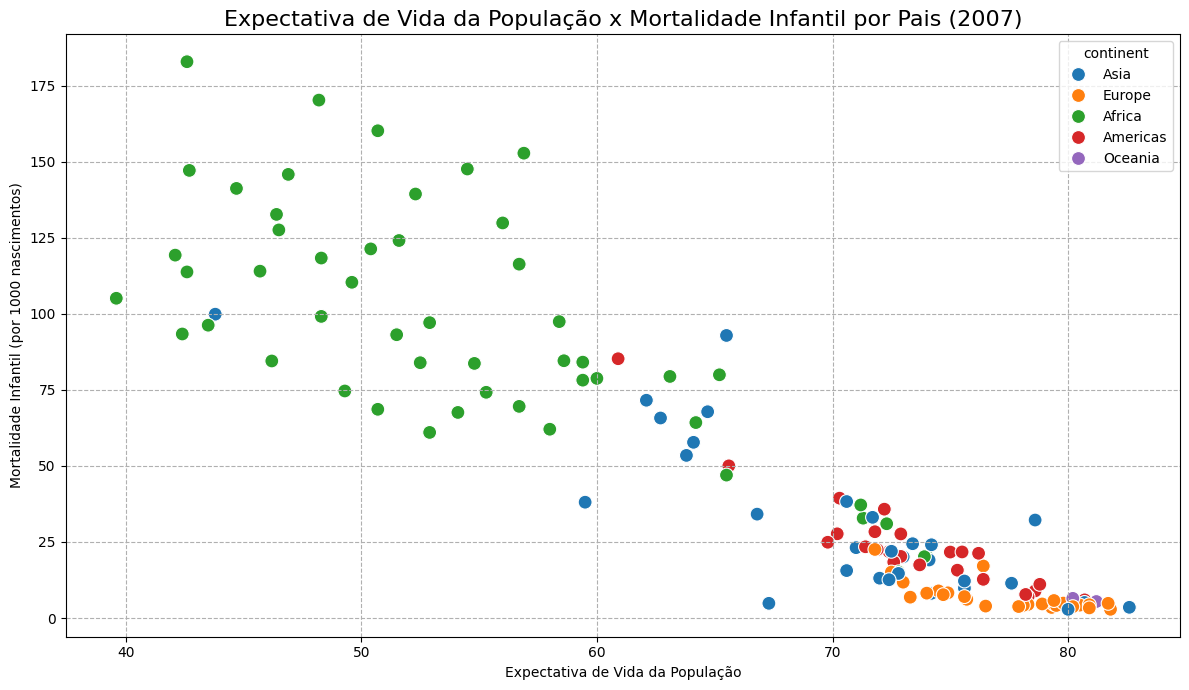

In [ ]:
# Selecionar dados de 2007
df_2007 = df[df['year'] == 2007]

# Gráfico
plot_scatter(
    data=df_2007,
    x='lifeExp',
    y='childMortalityPer1000Born',
    titulo='Expectativa de Vida da População x Mortalidade Infantil por Pais (2007)',
    label_x='Expectativa de Vida da População',
    label_y='Mortalidade Infantil (por 1000 nascimentos)',
    hue='continent',
    palette='tab10',
    tamanho_ponto=100,
    legenda_titulo='Continente',
    loc_legenda='lower right'
)

- __Explicação de cada gráfico gerado:__ O gráfico nos trás a visão da distribuição da taxa de mortalidade infantil de acordo com a expectativa de vida da população no ano de 2007. O objetivo é fazer um apanhado final e visualizar a correlação média entre esses 2 indicadores.
- __Justificativa da escolha do tipo de visualização:__ O gráfico foi escolhido para termos a visualização da relação da mortalidade de cada país não só com a expectativa de vida da população mas entre eles também. Além disso, o gráfico permite que vejamos a tendência dessa relação dos 2 indicadores, que já foi determinada como alta no gráfico de correlação
- __Interpretação dos resultados observados:__  Aqui há uma tendência muito forte de uma redução linear, mostrando que pais com expectativa de vida baixa sofrem muito mais com mortes infantis do que os países com populações mais longivas.Na maioria dos países onde o indice de expectativa de vida é mais alto, a taxa de mortalidade infantil é extremamente baixa, mostrando uma correlação direta entre esses dois indicadores
- __Discussão sobre **tendências globais** e **diferenças regionais**:__
    - No geral, analisando esse gráfico, vemos que existe uma expressiva relação de que países com populações que morrem mais ceo tem mais morte infantil, pois 90% dos paíes da África hoje se encontram espalhados na porção superior do gráfico. Isso pode se dever ao fato do abandono na morte de 1 ou dos 2 pais, além de outras condições de precariedade.
    - Por outro lado, em relação ao paises que tem uma expectativa de vida mais alta (acima de 70 anos), as mortes infantis ficam ali dentro do limite de 0 a 25 a cada 1000 nascimentos, mostrando que talvez haja menos abandono infantil e/ou o sistema de saúde é mais bem preparado para lidar com casos graves, coisas que não acontece em países com baixa expectativa de vida da população.

---
## 4. Interpretação das Visualizações

### Objetivo
Interpretar criticamente os dados com base nos gráficos e tabelas.

### Itens a incluir
- Explicação de cada gráfico gerado.  
- Justificativa da escolha do tipo de visualização.  
- Interpretação dos resultados observados.  
- Discussão sobre **tendências globais** e **diferenças regionais**.

---
## 5. Síntese dos Principais Insights

### Objetivo
Resumir os principais achados da análise.

### Itens a incluir
- **Padrões e tendências principais** (ex: crescimento da expectativa de vida, desigualdade econômica).  
- **Anomalias** ou exceções notáveis.  
- **Correlação** entre os indicadores analisados (PIB, população, expectativa de vida).  

### Markdown deve conter
- **Resumo analítico** dos resultados obtidos.  
- **Aplicações práticas**:
  - Implicações para políticas públicas.  
  - Relação com o desenvolvimento social e econômico.  
  - Observações sobre desigualdade global.

---
## 6. Conclusão e Reflexão

### Objetivo
Refletir sobre o processo de análise e o aprendizado obtido.

### Itens a incluir
- **Maiores desafios enfrentados** durante o trabalho.  
- **Principais aprendizados** obtidos.  
- **Habilidades desenvolvidas** (técnicas e analíticas).  
- **Reflexão final** sobre o impacto e relevância da análise.

#### Membros
1. Andre Augusto Ferreira Cabelo
2. Bruno Braga Guedes Cardoso
3. Bruno dos Santos Crivelli
4. Marcelo Tranche de Souza Junior